# Predicting Vaccination Likelihood: H1N1 and Seasonal Flu

<img src="images/header.webp">

## Executive Summary
This project aims to predict the likelihood of individuals receiving H1N1 and seasonal flu vaccines using data from the National 2009 H1N1 Flu Survey. Public health officials, policymakers, and vaccination organizations can use these insights to improve vaccination rates and public health outcomes.


# Business Understanding
## Project Overview
Public health is crucial and a big factor of public helath is vaccination.  This project aims to predict if individuals received the H1N1 and seasonal flu vaccines using data from the National 2009 H1N1 Flu Survey.  

## Real-World Problem
Understand factors that lead to people choosing to get a vaccinated against H1N1 and seasonal flu. Increasing uptake of vaccination will allow the public to be more innocuated against the adverse effects of both H1N1 and seasonal flu, and save lives.

## Stakeholders
The primary stakeholders for this project include public health officials, policymakers, organizations for vaccination and the public. Insights into the factors that drive vaccination behavior can benefit everyone. Insights into vaccination behavior can better communication strategies and lead to less people getting sick.

## Business Questions
This project will address the following key questions to provide actionable insights: 

1. What features most impact individuals' decisions to get vaccinated for H1N1 and seasonal flu?
2. Which models best predict vaccination likelihood?
3. Which group factors most impact vaccination rate and what targeted strategies can increase vaccination rates?

# Imports

In [1]:
#%load_ext cudf.pandas
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder, FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from math import ceil
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn import set_config
from sklearn.model_selection import GridSearchCV
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import LabelEncoder
#from catboost import CatBoostClassifier
import pickle

# Load Data

In [2]:
test_set_features = pd.read_csv("data/test_set_features.csv", index_col="respondent_id")
features_df = pd.read_csv("data/training_set_features.csv", index_col="respondent_id")
labels_df = pd.read_csv("data/training_set_labels.csv", index_col="respondent_id")

In [3]:
test_set_features.head()

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
respondent_id                                                            
26707                   2.0             2.0                        0.0   
26708                   1.0             1.0                        0.0   
26709                   2.0             2.0                        0.0   
26710                   1.0             1.0                        0.0   
26711                   3.0             1.0                        1.0   

               behavioral_avoidance  behavioral_face_mask  \
respondent_id                                               
26707                           1.0                   0.0   
26708                           0.0                   0.0   
26709                           0.0                   1.0   
26710                           0.0                   0.0   
26711                           1.0                   0.0   

               behavioral_wash_hands  behavioral_large_gatherings  \
respondent_id                                                       
26707                            1.0                          1.0   
26708                            0.0                          0.0   
26709                            1.0                          1.0   
26710                            0.0                          0.0   
26711                            1.0                          1.0   

               behavioral_outside_home  behavioral_touch_face  \
respondent_id                                                   
26707                              0.0                    1.0   
26708                              0.0                    0.0   
26709                              1.0                    1.0   
26710                              0.0                    0.0   
26711                              1.0                    1.0   

               doctor_recc_h1n1  ...             income_poverty  \
respondent_id                    ...                              
26707                       0.0  ...                  > $75,000   
26708                       0.0  ...              Below Poverty   
26709                       0.0  ...                  > $75,000   
26710                       1.0  ...  <= $75,000, Above Poverty   
26711                       0.0  ...  <= $75,000, Above Poverty   

               marital_status  rent_or_own   employment_status  \
respondent_id                                                    
26707             Not Married         Rent            Employed   
26708             Not Married         Rent            Employed   
26709                 Married          Own            Employed   
26710                 Married          Own  Not in Labor Force   
26711             Not Married          Own            Employed   

               hhs_geo_region                census_msa  household_adults  \
respondent_id                                                               
26707                mlyzmhmf  MSA, Not Principle  City               1.0   
26708                bhuqouqj                   Non-MSA               3.0   
26709                lrircsnp                   Non-MSA               1.0   
26710                lrircsnp  MSA, Not Principle  City               1.0   
26711                lzgpxyit                   Non-MSA               0.0   

               household_children  employment_industry  employment_occupation  
respondent_id                                                                  
26707                         0.0             atmlpfrs               hfxkjkmi  
26708                         0.0             atmlpfrs               xqwwgdyp  
26709                         0.0             nduyfdeo               pvmttkik  
26710                         0.0                  NaN                    NaN  
26711                         1.0             fcxhlnwr               mxkfnird  

[5 rows x 35 columns]

In [4]:
features_df.head()

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
respondent_id                                                            
0                       1.0             0.0                        0.0   
1                       3.0             2.0                        0.0   
2                       1.0             1.0                        0.0   
3                       1.0             1.0                        0.0   
4                       2.0             1.0                        0.0   

               behavioral_avoidance  behavioral_face_mask  \
respondent_id                                               
0                               0.0                   0.0   
1                               1.0                   0.0   
2                               1.0                   0.0   
3                               1.0                   0.0   
4                               1.0                   0.0   

               behavioral_wash_hands  behavioral_large_gatherings  \
respondent_id                                                       
0                                0.0                          0.0   
1                                1.0                          0.0   
2                                0.0                          0.0   
3                                1.0                          1.0   
4                                1.0                          1.0   

               behavioral_outside_home  behavioral_touch_face  \
respondent_id                                                   
0                                  1.0                    1.0   
1                                  1.0                    1.0   
2                                  0.0                    0.0   
3                                  0.0                    0.0   
4                                  0.0                    1.0   

               doctor_recc_h1n1  ...             income_poverty  \
respondent_id                    ...                              
0                           0.0  ...              Below Poverty   
1                           0.0  ...              Below Poverty   
2                           NaN  ...  <= $75,000, Above Poverty   
3                           0.0  ...              Below Poverty   
4                           0.0  ...  <= $75,000, Above Poverty   

               marital_status  rent_or_own   employment_status  \
respondent_id                                                    
0                 Not Married          Own  Not in Labor Force   
1                 Not Married         Rent            Employed   
2                 Not Married          Own            Employed   
3                 Not Married         Rent  Not in Labor Force   
4                     Married          Own            Employed   

               hhs_geo_region                census_msa  household_adults  \
respondent_id                                                               
0                    oxchjgsf                   Non-MSA               0.0   
1                    bhuqouqj  MSA, Not Principle  City               0.0   
2                    qufhixun  MSA, Not Principle  City               2.0   
3                    lrircsnp       MSA, Principle City               0.0   
4                    qufhixun  MSA, Not Principle  City               1.0   

               household_children  employment_industry  employment_occupation  
respondent_id                                                                  
0                             0.0                  NaN                    NaN  
1                             0.0             pxcmvdjn               xgwztkwe  
2                             0.0             rucpziij               xtkaffoo  
3                             0.0                  NaN                    NaN  
4                             0.0             wxleyezf               emcorrxb  

[5 rows x 35 columns]

In [5]:
labels_df.head()

h1n1_vaccine  seasonal_vaccine
respondent_id                                
0                         0                 0
1                         0                 1
2                         0                 0
3                         0                 1
4                         0                 0

We weren't given the labels for the test set and the forums for the data set said this was intentional they have the labels for it on their side for testing and we aren't allowed to see or use them.

We're supposed to test train split on the test data so we have our own validation set.

This makes the test data only usable if we did unsupervised learning so lets just drop it for now.

In [6]:
del test_set_features


# Data Understanding

The dataset used for this project comes from the National 2009 H1N1 Flu Survey.  Below is a description of the data's features.

### Target Variables

- **h1n1_vaccine**: Whether respondent received H1N1 flu vaccine. (0 = No, 1 = Yes)
- **seasonal_vaccine**: Whether respondent received seasonal flu vaccine. (0 = No, 1 = Yes)

### Dataset Features

| Feature Name               | Feature Data Type      | Feature Values                                                | Feature Description                                                                                                                                                               |
|----------------------------|------------------------|----------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| h1n1_concern               | Encoded Categorical    | 0 = Not at all concerned, 1 = Not very concerned, 2 = Somewhat concerned, 3 = Very concerned | Level of concern about the H1N1 flu.                                                                                                                                              |
| h1n1_knowledge             | Encoded Categorical    | 0 = No knowledge, 1 = A little knowledge, 2 = A lot of knowledge | Level of knowledge about H1N1 flu.                                                                                                                                              |
| behavioral_antiviral_meds  | Binary                 |                                                                | Has taken antiviral medications.                                                                                                                                                   |
| behavioral_avoidance       | Binary                 |                                                                | Has avoided close contact with others with flu-like symptoms.                                                                                                                      |
| behavioral_face_mask       | Binary                 |                                                                | Has bought a face mask.                                                                                                                                                            |
| behavioral_wash_hands      | Binary                 |                                                                | Has frequently washed hands or used hand sanitizer.                                                                                                                                |
| behavioral_large_gatherings| Binary                 |                                                                | Has reduced time at large gatherings.                                                                                                                                              |
| behavioral_outside_home    | Binary                 |                                                                | Has reduced contact with people outside of own household.                                                                                                                          |
| behavioral_touch_face      | Binary                 |                                                                | Has avoided touching eyes, nose, or mouth.                                                                                                                                         |
| doctor_recc_h1n1           | Binary                 |                                                                | H1N1 flu vaccine was recommended by doctor.                                                                                                                                        |
| doctor_recc_seasonal       | Binary                 |                                                                | Seasonal flu vaccine was recommended by doctor.                                                                                                                                    |
| chronic_med_condition      | Binary                 |                                                                | Has any of the following chronic medical conditions: asthma or another lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. |
| child_under_6_months       | Binary                 |                                                                | Has regular close contact with a child under the age of six months.                                                                                                                |
| health_worker              | Binary                 |                                                                | Is a healthcare worker.                                                                                                                                                            |
| health_insurance           | Binary                 |                                                                | Has health insurance.                                                                                                                                                              |
| opinion_h1n1_vacc_effective| Encoded Categorical    | 1 = Not at all effective, 2 = Not very effective, 3 = Don't know, 4 = Somewhat effective, 5 = Very effective | Respondent's opinion about H1N1 vaccine effectiveness.                                                                                                                             |
| opinion_h1n1_risk          | Encoded Categorical    | 1 = Very Low, 2 = Somewhat low, 3 = Don't know, 4 = Somewhat high, 5 = Very high | Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.                                                                                                     |
| opinion_h1n1_sick_from_vacc| Encoded Categorical    | 1 = Not at all worried, 2 = Not very worried, 3 = Don't know, 4 = Somewhat worried, 5 = Very worried | Respondent's worry of getting sick from taking H1N1 vaccine.                                                                                                                       |
| opinion_seas_vacc_effective| Encoded Categorical    | 1 = Not at all effective, 2 = Not very effective, 3 = Don't know, 4 = Somewhat effective, 5 = Very effective | Respondent's opinion about seasonal flu vaccine effectiveness.                                                                                                                     |
| opinion_seas_risk          | Encoded Categorical    | 1 = Very Low, 2 = Somewhat low, 3 = Don't know, 4 = Somewhat high, 5 = Very high | Respondent's opinion about risk of getting sick with seasonal flu without vaccine.                                                                                                 |
| opinion_seas_sick_from_vacc| Encoded Categorical    | 1 = Not at all worried, 2 = Not very worried, 3 = Don't know, 4 = Somewhat worried, 5 = Very worried | Respondent's worry of getting sick from taking seasonal flu vaccine.                                                                                                               |
| age_group                  | Categorical            | | Age group of respondent.                                                                                                                                                           |
| education                  | Categorical            | | Self-reported education level.                                                                                                                                                     |
| race                       | Categorical            | | Race of respondent.                                                                                                                                                                |
| sex                        | Categorical            | | Sex of respondent.                                                                                                                                                                 |
| income_poverty             | Categorical            | | Household annual income of respondent with respect to 2008 Census poverty thresholds.                                                                                              |
| marital_status             | Categorical            | | Marital status of respondent.                                                                                                                                                      |
| rent_or_own                | Categorical            | | Housing situation of respondent.                                                                                                                                                   |
| employment_status          | Categorical            | | Employment status of respondent.                                                                                                                                                   |
| hhs_geo_region             | Categorical            | | Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services.                                                         |
| census_msa                 | Categorical            | | Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.                                                                                   |
| household_adults           | Numerical              | 0, 1, 2, 3                                                    | Number of other adults in household, top-coded to 3.                                                                                                                               |
| household_children         | Numerical              | 0, 1, 2, 3                                                    | Number of children in household, top-coded to 3.                                                                                                                                   |
| employment_industry        | Categorical            | | Type of industry respondent is employed in.                                                                                                                                        |
| employment_occupation      | Categorical            | | Type of occupation of respondent.                                                                                                                                                   |



## EDA
- **Missing Values:** Analysis and handling of missing values.
- **Outliers**: See if the data might have outliers.
- **Feature Distribution:** Understanding the distribution of features as well as any class imbalances.
- **Correlation Analysis:** Exploring correlations between features and target variables.
- **Standard Deviation on Likelihood:** Determine which features seem to cause a higher impact on deciding to get vaccinated for feature selection and data understanding.

### .info
We look at nulls and data types to get an overview of the data

In [7]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker        

In [8]:
labels_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26707 entries, 0 to 26706
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   h1n1_vaccine      26707 non-null  int64
 1   seasonal_vaccine  26707 non-null  int64
dtypes: int64(2)
memory usage: 625.9 KB


### .isna()
We see how many nulls are in each feature

In [9]:

print("features_df: (Length:",str(len(features_df))+")")
print(features_df.isna().sum(),"\n\n")
print("labels_df: (Length:",str(len(labels_df))+")")
print(labels_df.isna().sum())


features_df: (Length: 26707)
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_s

In [10]:
features_df.head(3)

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
respondent_id                                                            
0                       1.0             0.0                        0.0   
1                       3.0             2.0                        0.0   
2                       1.0             1.0                        0.0   

               behavioral_avoidance  behavioral_face_mask  \
respondent_id                                               
0                               0.0                   0.0   
1                               1.0                   0.0   
2                               1.0                   0.0   

               behavioral_wash_hands  behavioral_large_gatherings  \
respondent_id                                                       
0                                0.0                          0.0   
1                                1.0                          0.0   
2                                0.0                          0.0   

               behavioral_outside_home  behavioral_touch_face  \
respondent_id                                                   
0                                  1.0                    1.0   
1                                  1.0                    1.0   
2                                  0.0                    0.0   

               doctor_recc_h1n1  ...             income_poverty  \
respondent_id                    ...                              
0                           0.0  ...              Below Poverty   
1                           0.0  ...              Below Poverty   
2                           NaN  ...  <= $75,000, Above Poverty   

               marital_status  rent_or_own   employment_status  \
respondent_id                                                    
0                 Not Married          Own  Not in Labor Force   
1                 Not Married         Rent            Employed   
2                 Not Married          Own            Employed   

               hhs_geo_region                census_msa  household_adults  \
respondent_id                                                               
0                    oxchjgsf                   Non-MSA               0.0   
1                    bhuqouqj  MSA, Not Principle  City               0.0   
2                    qufhixun  MSA, Not Principle  City               2.0   

               household_children  employment_industry  employment_occupation  
respondent_id                                                                  
0                             0.0                  NaN                    NaN  
1                             0.0             pxcmvdjn               xgwztkwe  
2                             0.0             rucpziij               xtkaffoo  

[3 rows x 35 columns]

### .value_counts
We look at value counts for categories to see class imbalance and what values exist
#### Strings for binary encoding

In [11]:
features_df["marital_status"].value_counts()

marital_status
Married        13555
Not Married    11744
Name: count, dtype: int64

In [12]:
features_df["rent_or_own"].value_counts()

rent_or_own
Own     18736
Rent     5929
Name: count, dtype: int64

#### Strings with 3 categories

In [13]:
features_df["income_poverty"].value_counts()

income_poverty
<= $75,000, Above Poverty    12777
> $75,000                     6810
Below Poverty                 2697
Name: count, dtype: int64

In [14]:
features_df["employment_status"].value_counts()

employment_status
Employed              13560
Not in Labor Force    10231
Unemployed             1453
Name: count, dtype: int64

In [15]:
features_df["census_msa"].value_counts()

census_msa
MSA, Not Principle  City    11645
MSA, Principle City          7864
Non-MSA                      7198
Name: count, dtype: int64

#### Strings with many categories

In [16]:
features_df["employment_occupation"].value_counts()

employment_occupation
xtkaffoo    1778
mxkfnird    1509
emcorrxb    1270
cmhcxjea    1247
xgwztkwe    1082
hfxkjkmi     766
qxajmpny     548
xqwwgdyp     485
kldqjyjy     469
uqqtjvyb     452
tfqavkke     388
ukymxvdu     372
vlluhbov     354
oijqvulv     344
ccgxvspp     341
bxpfxfdn     331
haliazsg     296
rcertsgn     276
xzmlyyjv     248
dlvbwzss     227
hodpvpew     208
dcjcmpih     148
pvmttkik      98
Name: count, dtype: int64

In [17]:
features_df["hhs_geo_region"].value_counts()

hhs_geo_region
lzgpxyit    4297
fpwskwrf    3265
qufhixun    3102
oxchjgsf    2859
kbazzjca    2858
bhuqouqj    2846
mlyzmhmf    2243
lrircsnp    2078
atmpeygn    2033
dqpwygqj    1126
Name: count, dtype: int64

In [18]:
features_df["employment_industry"].value_counts()

employment_industry
fcxhlnwr    2468
wxleyezf    1804
ldnlellj    1231
pxcmvdjn    1037
atmlpfrs     926
arjwrbjb     871
xicduogh     851
mfikgejo     614
vjjrobsf     527
rucpziij     523
xqicxuve     511
saaquncn     338
cfqqtusy     325
nduyfdeo     286
mcubkhph     275
wlfvacwt     215
dotnnunm     201
haxffmxo     148
msuufmds     124
phxvnwax      89
qnlwzans      13
Name: count, dtype: int64

In [19]:
features_df["employment_occupation"].value_counts()

employment_occupation
xtkaffoo    1778
mxkfnird    1509
emcorrxb    1270
cmhcxjea    1247
xgwztkwe    1082
hfxkjkmi     766
qxajmpny     548
xqwwgdyp     485
kldqjyjy     469
uqqtjvyb     452
tfqavkke     388
ukymxvdu     372
vlluhbov     354
oijqvulv     344
ccgxvspp     341
bxpfxfdn     331
haliazsg     296
rcertsgn     276
xzmlyyjv     248
dlvbwzss     227
hodpvpew     208
dcjcmpih     148
pvmttkik      98
Name: count, dtype: int64

### Labels
Lets explore the labels, first we'll see if the classes are unbalanced and if they are correlated since it is a multi target problem

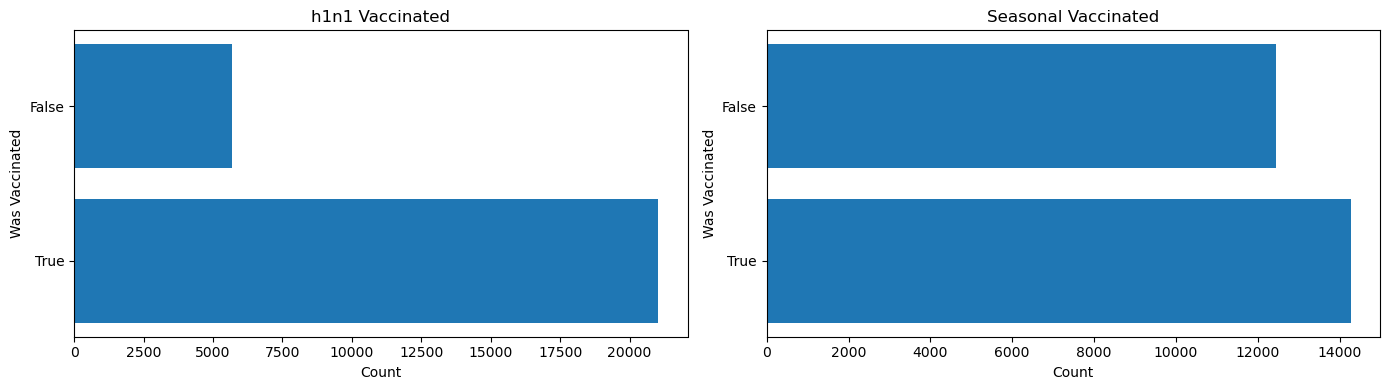

In [20]:
fig, ax = plt.subplots(1,2,figsize=(14,4))
value_counts = labels_df['h1n1_vaccine'].value_counts()
ax[0].barh(['True','False'],value_counts.values)
ax[0].set_title('h1n1 Vaccinated')
ax[0].set_ylabel('Was Vaccinated')
ax[0].set_xlabel('Count')

value_counts = labels_df['seasonal_vaccine'].value_counts()
ax[1].barh(['True','False'],value_counts.values)
ax[1].set_title('Seasonal Vaccinated')
ax[1].set_ylabel('Was Vaccinated')
ax[1].set_xlabel('Count')
plt.tight_layout()
plt.show()

h1n1 is definitely very unbalanced, seasonal is much less so.  We might have to use SMOTE for h1n1 and but seasonal might be ok as is.

next lets check for correlation!

In [21]:
labels_df["h1n1_vaccine"].corr(labels_df["seasonal_vaccine"])

0.37714265306144473

It seems there is some correlation, but these days both flus are given at the same time in the same shot.
In 2009 the H1N1 was created.  The flu shots were given at a similar time.  So we can't use either to predict the other or we'd get data leakage.

It seems there is a story here, a lot more people got the seasonal vaccine.
If they got one there was more chance they got both then if they didn't get the seasonal.


### Non-processed Histograms


In [22]:
uniq_dict = {}
for column in features_df.columns:
    uniq_dict[column] = features_df[column].nunique()
uniq_dict.items()

dict_items([('h1n1_concern', 4), ('h1n1_knowledge', 3), ('behavioral_antiviral_meds', 2), ('behavioral_avoidance', 2), ('behavioral_face_mask', 2), ('behavioral_wash_hands', 2), ('behavioral_large_gatherings', 2), ('behavioral_outside_home', 2), ('behavioral_touch_face', 2), ('doctor_recc_h1n1', 2), ('doctor_recc_seasonal', 2), ('chronic_med_condition', 2), ('child_under_6_months', 2), ('health_worker', 2), ('health_insurance', 2), ('opinion_h1n1_vacc_effective', 5), ('opinion_h1n1_risk', 5), ('opinion_h1n1_sick_from_vacc', 5), ('opinion_seas_vacc_effective', 5), ('opinion_seas_risk', 5), ('opinion_seas_sick_from_vacc', 5), ('age_group', 5), ('education', 4), ('race', 4), ('sex', 2), ('income_poverty', 3), ('marital_status', 2), ('rent_or_own', 2), ('employment_status', 3), ('hhs_geo_region', 10), ('census_msa', 3), ('household_adults', 4), ('household_children', 4), ('employment_industry', 21), ('employment_occupation', 23)])

In [23]:
if False:
    num_plots = len(uniq_dict)
    num_cols = 4
    num_rows = ceil(num_plots / num_cols)

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 6))

    for ax, (key, value) in zip(axs.flatten(), uniq_dict.items()):
        sns.histplot(features_df[key], bins=value, ax=ax)
        ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
        ax.set_title(key)
        ax.set_xlabel("Value")
        ax.set_ylabel("Frequency")
        ax.tick_params(axis='x', rotation=90)

    # If the number of plots is not a perfect multiple of num_cols, hide the extra subplots
    for i in range(num_plots, num_rows * num_cols):
        fig.delaxes(axs.flatten()[i])

    plt.tight_layout()
    plt.show()

### Features
We'll go ahead and graph all the features and just get a nice quick visual overview

In [24]:

all_df = pd.concat([features_df,labels_df],axis=1)
all_df.head()

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
respondent_id                                                            
0                       1.0             0.0                        0.0   
1                       3.0             2.0                        0.0   
2                       1.0             1.0                        0.0   
3                       1.0             1.0                        0.0   
4                       2.0             1.0                        0.0   

               behavioral_avoidance  behavioral_face_mask  \
respondent_id                                               
0                               0.0                   0.0   
1                               1.0                   0.0   
2                               1.0                   0.0   
3                               1.0                   0.0   
4                               1.0                   0.0   

               behavioral_wash_hands  behavioral_large_gatherings  \
respondent_id                                                       
0                                0.0                          0.0   
1                                1.0                          0.0   
2                                0.0                          0.0   
3                                1.0                          1.0   
4                                1.0                          1.0   

               behavioral_outside_home  behavioral_touch_face  \
respondent_id                                                   
0                                  1.0                    1.0   
1                                  1.0                    1.0   
2                                  0.0                    0.0   
3                                  0.0                    0.0   
4                                  0.0                    1.0   

               doctor_recc_h1n1  ...  rent_or_own   employment_status  \
respondent_id                    ...                                    
0                           0.0  ...          Own  Not in Labor Force   
1                           0.0  ...         Rent            Employed   
2                           NaN  ...          Own            Employed   
3                           0.0  ...         Rent  Not in Labor Force   
4                           0.0  ...          Own            Employed   

               hhs_geo_region                census_msa  household_adults  \
respondent_id                                                               
0                    oxchjgsf                   Non-MSA               0.0   
1                    bhuqouqj  MSA, Not Principle  City               0.0   
2                    qufhixun  MSA, Not Principle  City               2.0   
3                    lrircsnp       MSA, Principle City               0.0   
4                    qufhixun  MSA, Not Principle  City               1.0   

               household_children  employment_industry  employment_occupation  \
respondent_id                                                                   
0                             0.0                  NaN                    NaN   
1                             0.0             pxcmvdjn               xgwztkwe   
2                             0.0             rucpziij               xtkaffoo   
3                             0.0                  NaN                    NaN   
4                             0.0             wxleyezf               emcorrxb   

               h1n1_vaccine  seasonal_vaccine  
respondent_id                                  
0                         0                 0  
1                         0                 1  
2                         0                 0  
3                         0                 1  
4                         0                 0  

[5 rows x 37 columns]

#### Column Data Types
There's not so many cols we can't just categorize them by hand so here we go

In [25]:
encoded_categorical_cols = [
    'h1n1_concern', 
    'h1n1_knowledge', 
    'opinion_h1n1_vacc_effective', 
    'opinion_h1n1_risk', 
    'opinion_h1n1_sick_from_vacc', 
    'opinion_seas_vacc_effective', 
    'opinion_seas_risk', 
    'opinion_seas_sick_from_vacc'
]
binary_cols = [
    'behavioral_antiviral_meds', 
    'behavioral_avoidance', 
    'behavioral_face_mask', 
    'behavioral_wash_hands', 
    'behavioral_large_gatherings', 
    'behavioral_outside_home', 
    'behavioral_touch_face', 
    'doctor_recc_h1n1', 
    'doctor_recc_seasonal', 
    'chronic_med_condition', 
    'child_under_6_months', 
    'health_worker', 
    'health_insurance'
]
categorical_cols = [
    'age_group', 
    'education', 
    'race', 
    'sex', 
    'income_poverty', 
    'marital_status', 
    'rent_or_own', 
    'employment_status', 
    'hhs_geo_region', 
    'census_msa', 
    'employment_industry', 
    'employment_occupation'
]
numeric_cols = [
    'household_adults', 
    'household_children'
]

#this will let make the labels better 
map_dict = {
    'h1n1_concern': {
        0: "Not at all concerned",
        1: "Not very concerned",
        2: "Somewhat concerned",
        3: "Very concerned"
    },
    'h1n1_knowledge': {
        0: "No knowledge",
        1: "A little knowledge",
        2: "A lot of knowledge"
    },
    'opinion_h1n1_vacc_effective': {
        1: "Not at all effective",
        2: "Not very effective",
        3: "Don't know",
        4: "Somewhat effective",
        5: "Very effective"
    },
    'opinion_h1n1_risk': {
        1: "Very Low",
        2: "Somewhat low",
        3: "Don't know",
        4: "Somewhat high",
        5: "Very high"
    },
    'opinion_h1n1_sick_from_vacc': {
        1: "Not at all worried",
        2: "Not very worried",
        3: "Don't know",
        4: "Somewhat worried",
        5: "Very worried"
    },
    'opinion_seas_vacc_effective': {
        1: "Not at all effective",
        2: "Not very effective",
        3: "Don't know",
        4: "Somewhat effective",
        5: "Very effective"
    },
    'opinion_seas_risk': {
        1: "Very Low",
        2: "Somewhat low",
        3: "Don't know",
        4: "Somewhat high",
        5: "Very high"
    },
    'opinion_seas_sick_from_vacc': {
        1: "Not at all worried",
        2: "Not very worried",
        3: "Don't know",
        4: "Somewhat worried",
        5: "Very worried"
    }
}

Now we need to go ahead and figure out how best to visualize all of these based on their data types

In [26]:
def feature_vs_label(target,col):
    stacked_df = (all_df[[target, col]]
                .groupby([target, col])
                .size()
                .unstack(target)
            )
    return stacked_df

In [27]:
f = numeric_cols[0]
feature_vs_label('h1n1_vaccine',f)

h1n1_vaccine          0     1
household_adults             
0.0                6471  1585
1.0               11209  3265
2.0                2240   563
3.0                 903   222

In [28]:
features_df.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [29]:
label_cols = ['h1n1_vaccine', 'seasonal_vaccine']
feature_vaxrate_std = {}

def plot_features(cols):
    numfeatures = len(cols) * len(label_cols)
    numcols = 2
    numrows = (numfeatures + numcols - 1) // numcols
    numrows = max(1, numrows)

    figsizey = 7 * numrows
    fig, ax = plt.subplots(numrows, numcols, figsize=(18, figsizey))
    ax = ax.flatten()

    count = 0

    for f in cols:
        for l in label_cols:
            stacked_df = feature_vs_label(l, f)
            stacked_df.plot(kind='barh', stacked=True, ax=ax[count])
            ax[count].set_xlabel('Count')
            ax[count].set_ylabel(f)
            ax[count].set_title(f"{f} vs {l}")

            variances = []
            # Set xlim to add padding to the right
            current_xlim = ax[count].get_xlim()[1]
            ax[count].set_xlim(0, current_xlim * 1.07)
            # Annotate with percentages
            for i in range(stacked_df.shape[0]):
                v0 = stacked_df.iloc[i, 0]
                v1 = stacked_df.iloc[i, 1]
                total = v0 + v1
                percentage = (v1 / total) * 100 if total != 0 else 0
                ax[count].text(v0 + v1 + total * 0.01, i, f'{percentage:.1f}%', color='black', va='center')
                variances.append(percentage)
            variances_df = pd.DataFrame(variances)
            feature_vaxrate_std[f"{f}||{l}"] = variances_df.std()[0]

            # Modify legend
            handles, labels = ax[count].get_legend_handles_labels()
            labels = ['No', 'Yes']  # Replace 0 with 'No' and 1 with 'Yes'
            ax[count].legend(handles, labels, title='Vaccinated?')

            count += 1

    plt.tight_layout()
    plt.show()

#### Plot Numeric Features

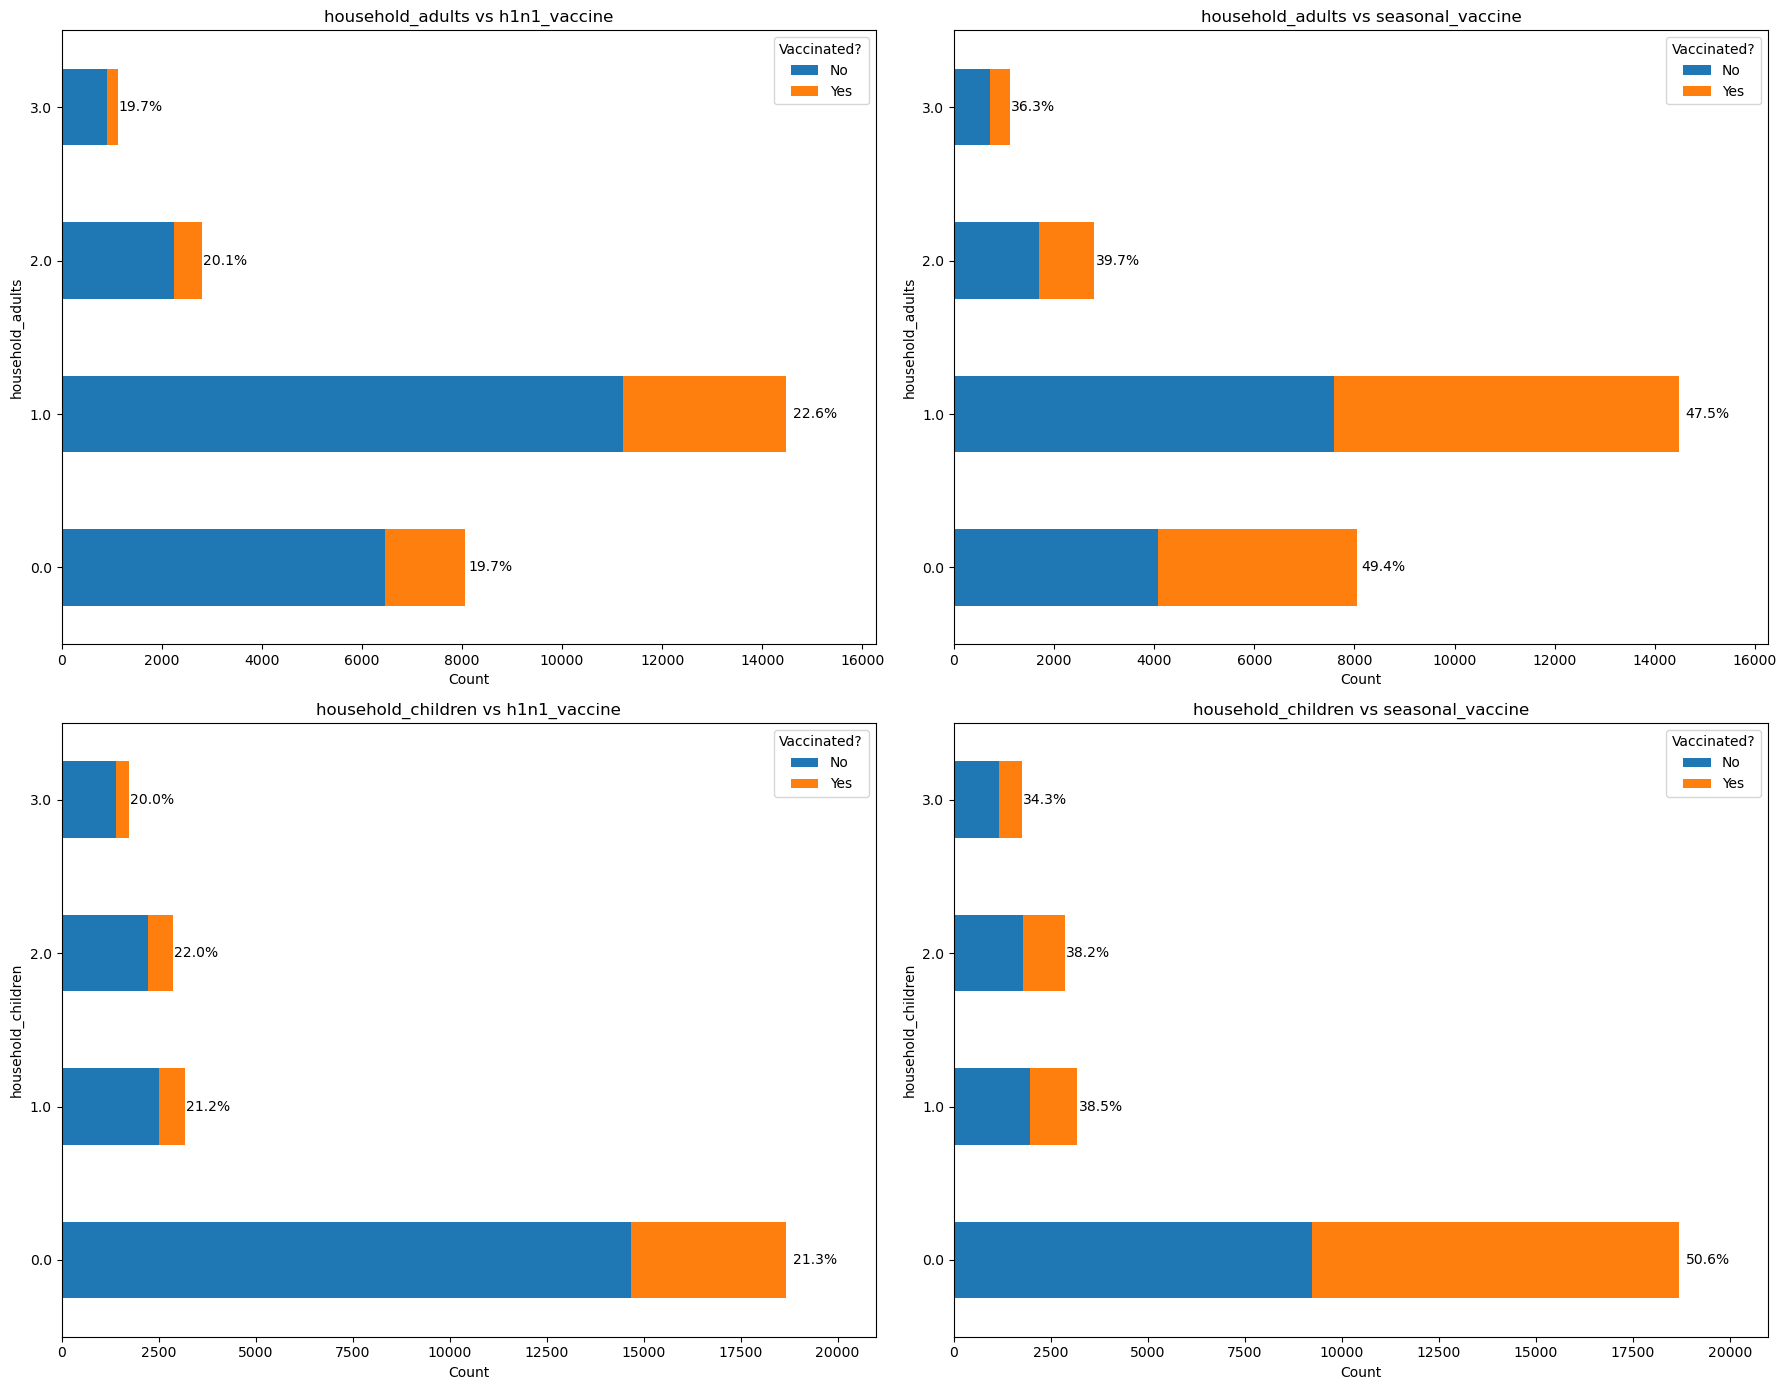

In [30]:
plot_features(numeric_cols)

#### Plot Binary Features

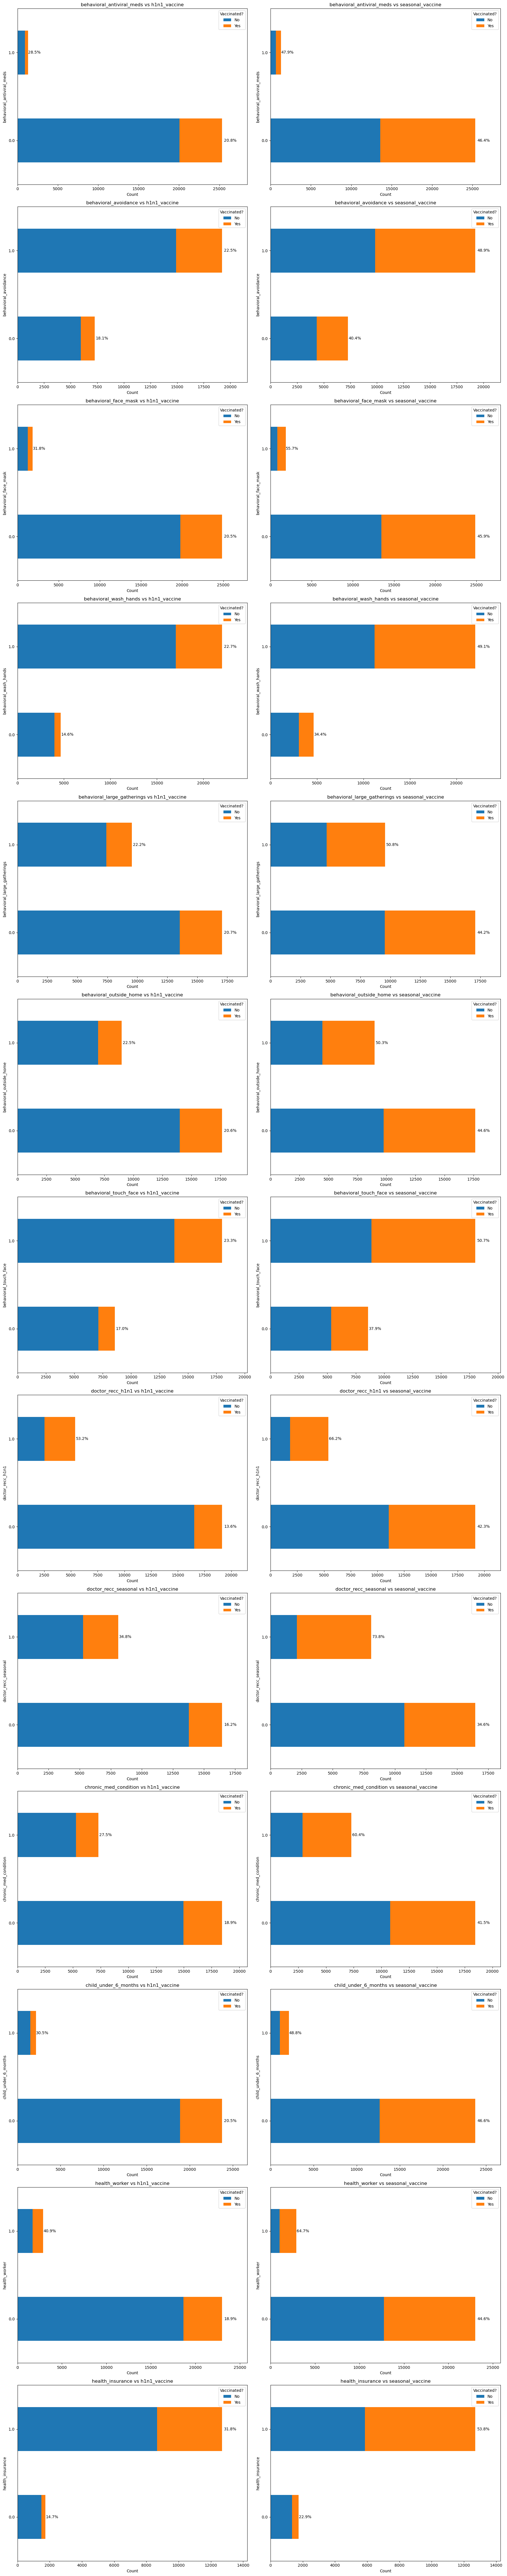

In [31]:
plot_features(binary_cols)

#### Plot Categorical Features

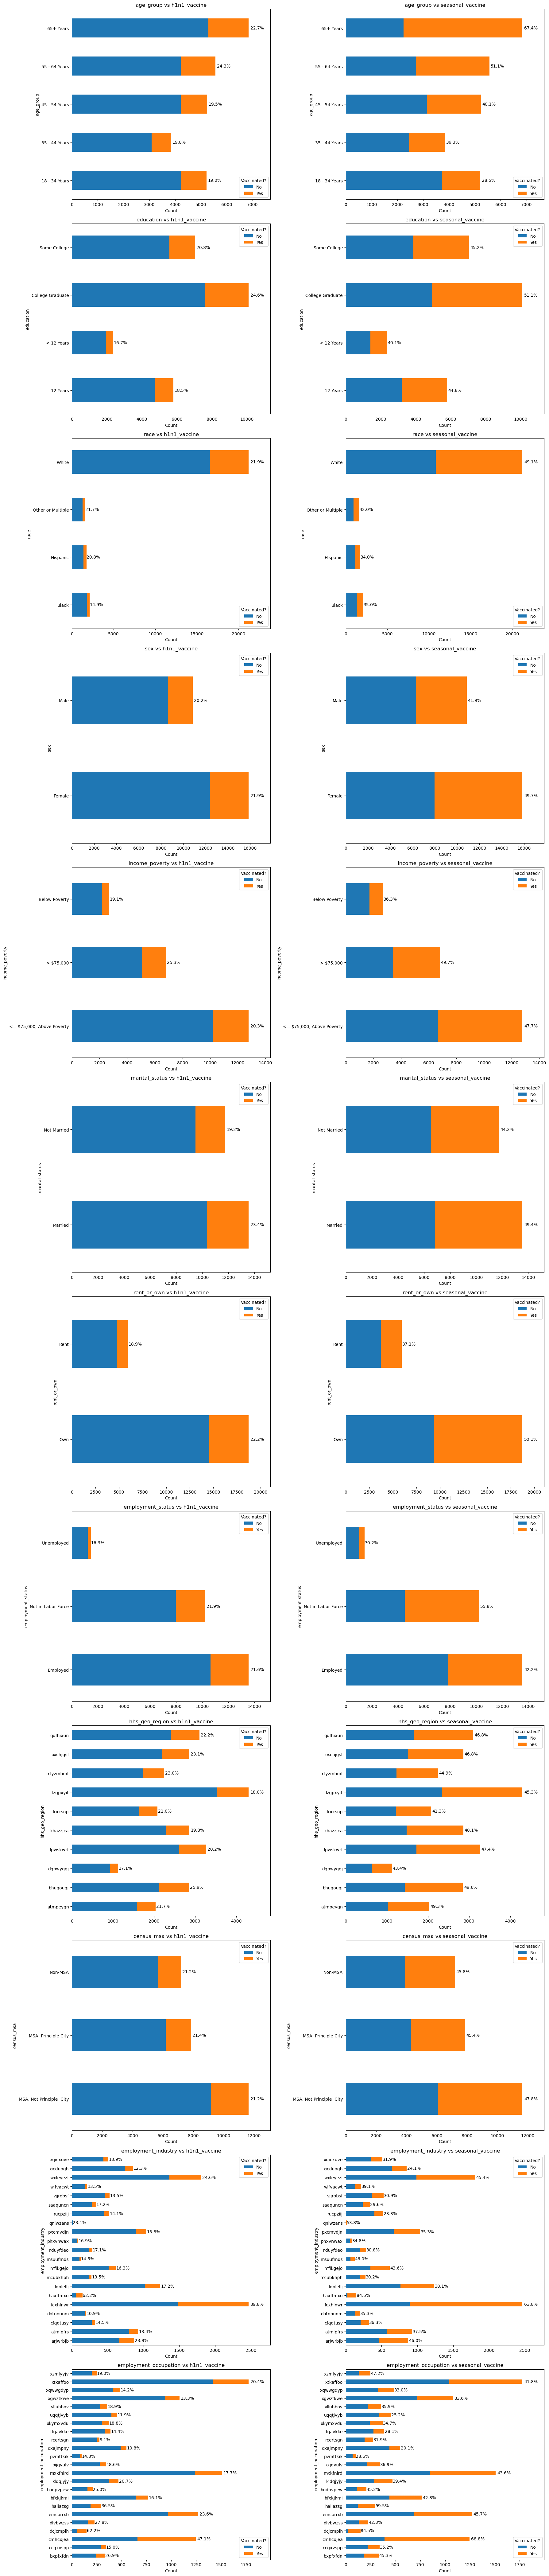

In [32]:
plot_features(categorical_cols)

#### Plot Encoded Categorical Features

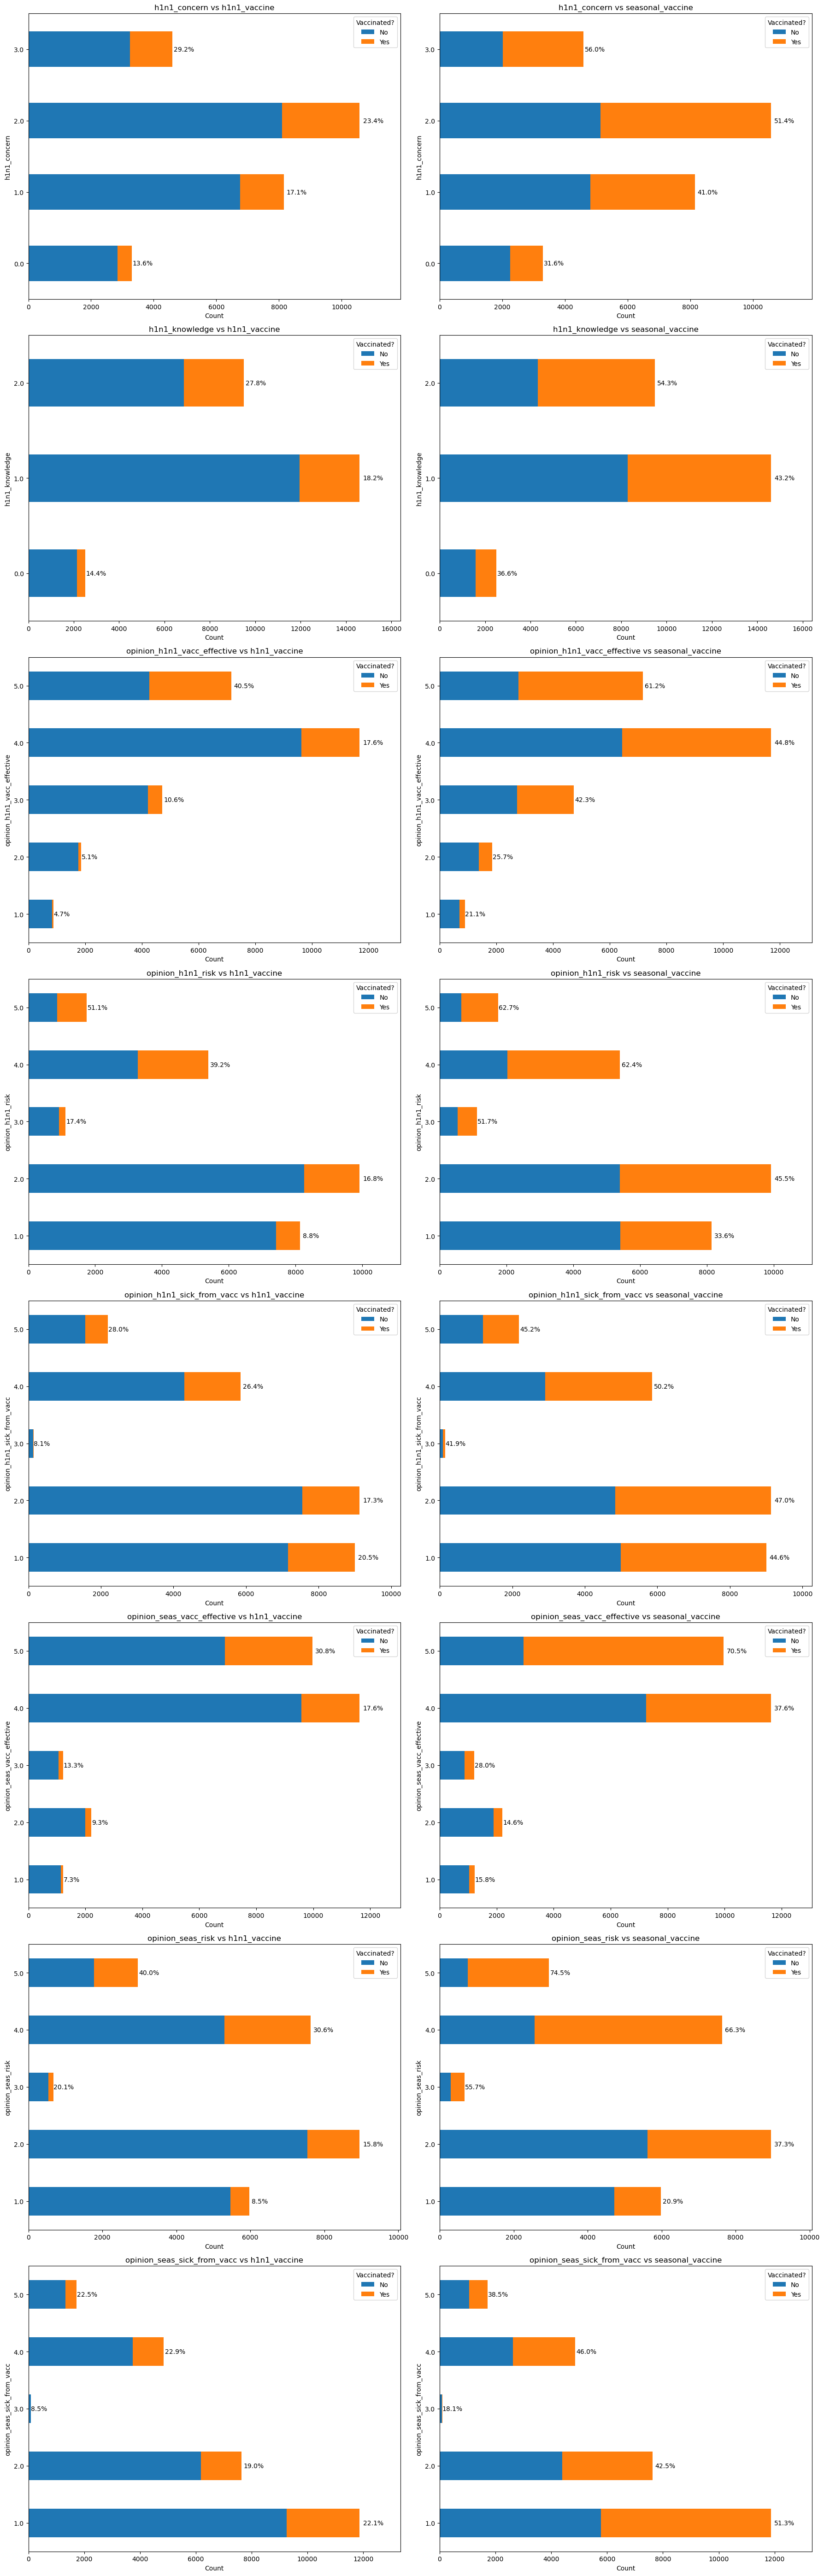

In [33]:
#TODO use map_dict to make it so the y labels are what the encoded variable means
plot_features(encoded_categorical_cols)


#### Sorted Feature STD
This stat indicates (not tells) to us which might be the most predictive features!  
The higher the standard deviation, the more likeliehood changed based on the features values
It's not a perfect indicator but it's still very helpful!

In [34]:
sorted_feature_vaxrate_std = dict(sorted(feature_vaxrate_std.items(), key=lambda item: item[1], reverse=True))
sorted_feature_vaxrate_std

{'doctor_recc_h1n1||h1n1_vaccine': 28.00062994151647,
 'doctor_recc_seasonal||seasonal_vaccine': 27.731963742216152,
 'opinion_seas_vacc_effective||seasonal_vaccine': 22.83866596149059,
 'health_insurance||seasonal_vaccine': 21.831103733267415,
 'opinion_seas_risk||seasonal_vaccine': 21.791005016217483,
 'opinion_h1n1_risk||h1n1_vaccine': 17.716726356220235,
 'doctor_recc_h1n1||seasonal_vaccine': 16.92200580713111,
 'opinion_h1n1_vacc_effective||seasonal_vaccine': 16.100568121794122,
 'health_worker||h1n1_vaccine': 15.602896729017194,
 'age_group||seasonal_vaccine': 15.093039358651634,
 'opinion_h1n1_vacc_effective||h1n1_vaccine': 14.803021781042885,
 'health_worker||seasonal_vaccine': 14.24831075331313,
 'employment_occupation||seasonal_vaccine': 14.203101148648718,
 'employment_industry||seasonal_vaccine': 13.990129229021175,
 'chronic_med_condition||seasonal_vaccine': 13.326345399494874,
 'doctor_recc_seasonal||h1n1_vaccine': 13.152344758749999,
 'employment_status||seasonal_vaccine

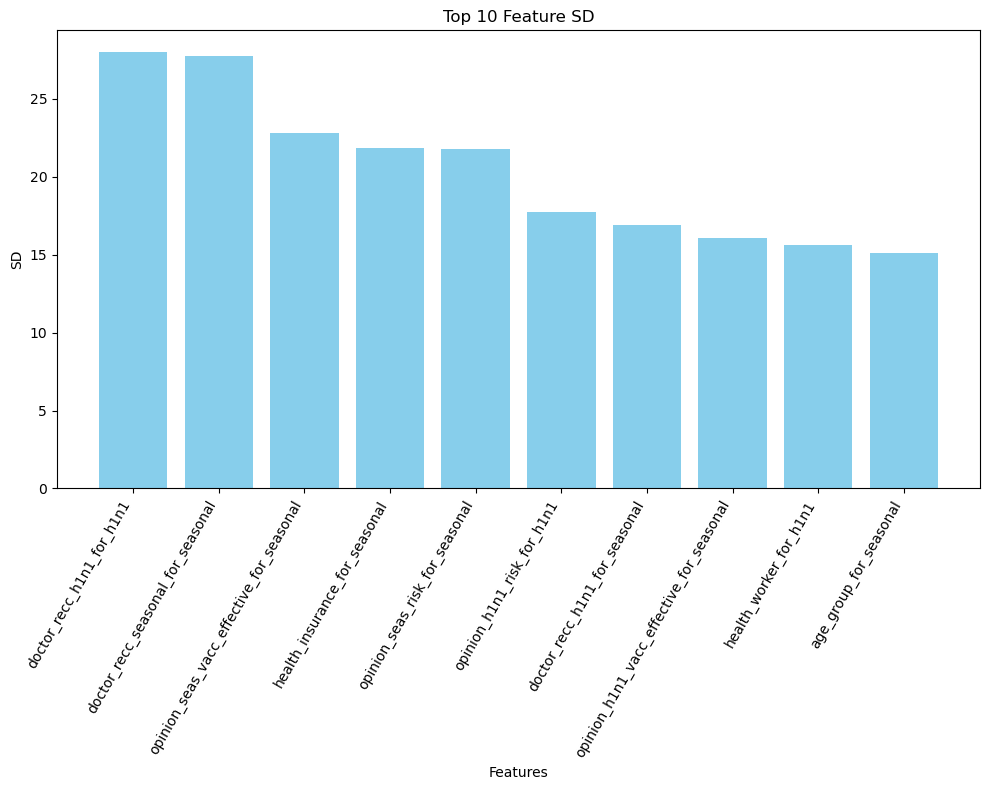

In [35]:
modified_dict = {}
for key, value in sorted_feature_vaxrate_std.items():
    index = key.index("||")
    first_part = key[:index]
    second_part = key[index + 2:].replace('_vaccine', '')
    new_key = f"{first_part}_for_{second_part}"
    modified_dict[new_key] = value

sorted_modified_dict = dict(sorted(modified_dict.items(), key=lambda item: item[1], reverse=True)[:10])

labels = list(sorted_modified_dict.keys())
values = list(sorted_modified_dict.values())

plt.figure(figsize=(10, 8))
plt.bar(labels, values, color='skyblue')
plt.xlabel('Features')
plt.ylabel('SD')
plt.title('Top 10 Feature SD')
plt.xticks(rotation=60, ha='right',fontsize=10)
plt.tight_layout()
plt.show()

It seems a lot of features can change the likeliehood quite a bit!  

Here are the top ones and they make sense, doctor recommendation and personal opinions hold a lot of decision making power!  Health insurance also plays a huge role.  Interestingly, even being recommended the other vaccine or having a good opinion on the other vaccine also changes likeliehood quite a bit!

```
'doctor_recc_h1n1_h1n1_vaccine': 28.00062994151647,
'doctor_recc_seasonal_seasonal_vaccine': 27.731963742216152,
'opinion_seas_vacc_effective_seasonal_vaccine': 22.83866596149059,
'health_insurance_seasonal_vaccine': 21.831103733267415,
'opinion_seas_risk_seasonal_vaccine': 21.791005016217483,
'opinion_h1n1_risk_h1n1_vaccine': 17.716726356220235,
'doctor_recc_h1n1_seasonal_vaccine': 16.92200580713111,
'opinion_h1n1_vacc_effective_seasonal_vaccine': 16.100568121794122,
```

# Data Preprocessing

## Test Train Split
To ensure we don't get data leakage on any preprocessing we do the test train split first

In [36]:
X_train, X_test, y_train, y_test = train_test_split(features_df, labels_df, test_size=0.2, random_state=42)

## Feature Selection
This feature selection allows us to pick a percentage of the top features based on their standard deviation and thus should be a good indicator of how much impact a decision has on getting vaccinated.

In [37]:
def get_top_percentage(sorted_dict, percentage):

    if not 0 < percentage <= 100:
        raise ValueError("Percentage must be between 0 and 100")

    top_count = int(len(sorted_dict) * (percentage / 100))
    keys = list(sorted_dict.keys())
    top_percentage = {key: sorted_dict[key] for key in keys[:top_count]}
    
    return top_percentage

def feature_selector(train_df, test_df, top_percentage):
    top_features = get_top_percentage(sorted_feature_vaxrate_std, top_percentage)
    unique_cols = set()
    for col in top_features.keys():
        parts = col.split('||')
        unique_cols.update(parts)
    top_cols = list(unique_cols)
    cols_to_delete = ['seasonal_vaccine', 'h1n1_vaccine']
    top_cols = [col for col in top_cols if col not in cols_to_delete]

    return train_df[top_cols], test_df[top_cols]

def get_existing_columns(df, col_list):
    return [col for col in col_list if col in df.columns]

## Preprocessing Function
This preprocessing function is used extensively for the models.  It allows use to "tune" the preprocessing as if they are hyper parameters themselves.  This allows us to find and fit:
* feature selection percentage based on top std scores for a set
* ensure we get copies of the train, test, target_train and target_test dfs so that each model has its own set of data.
* change scalers
* change imputing strategies based on numeric or categorical
* do one hot encoding
* use smote for class imbalance
* uses pipelines to make sure each step works together
* ensures the test and train sets have the exact same things applied to avoid data leakage or confusing results in models

Prior variations of this function also had class weights and more, but it was refactored to this after a lot of trial and error with ideas.  Next steps includes making this preprocessor more robust and have more features.


In [38]:
def final_preprocessor(train_df, test_df, target_train_df, target_test_df, scaler='standard', 
                       num_imputer_strategy='median', cat_imputer_value='None', use_smote=False,
                       feature_selection_percent=100, do_ohe=True, for_catboost=False):
    train_df = train_df.copy()
    test_df = test_df.copy()
    target_train_df = target_train_df.copy()
    target_test_df = target_test_df.copy()

    ncols = numeric_cols
    bcols = binary_cols
    ecols = encoded_categorical_cols
    ccols = categorical_cols

    if feature_selection_percent < 100:
        train_df, test_df = feature_selector(train_df, test_df, feature_selection_percent)
        ncols = get_existing_columns(train_df, ncols)
        bcols = get_existing_columns(train_df, bcols)
        ecols = get_existing_columns(train_df, ecols)
        ccols = get_existing_columns(train_df, ccols)

    if feature_selection_percent == 100:
        # Collect all defined columns
        all_defined_columns = numeric_cols + binary_cols + encoded_categorical_cols + categorical_cols

        # Assert that all columns are used
        missing_columns = set(train_df.columns) - set(all_defined_columns)
        extra_columns = set(all_defined_columns) - set(train_df.columns)
        
        assert len(missing_columns) == 0, f"Missing columns: {missing_columns}"
        assert len(extra_columns) == 0, f"Extra columns: {extra_columns}"

    num_scaler = StandardScaler() if scaler == 'standard' else MinMaxScaler()
    
    # Define preprocessing for numerical and binary columns
    numerical_pipeline = None
    if num_imputer_strategy == '-1':
        numerical_pipeline = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant', fill_value=-1)),
            ('scaler', num_scaler) if not for_catboost else ('scaler', 'passthrough')
        ])
    else:
        numerical_pipeline = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', num_scaler) if not for_catboost else ('scaler', 'passthrough')
        ])
    
    # Define preprocessing for categorical columns
    categorical_pipeline = None
    if do_ohe:
        categorical_pipeline = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant', fill_value=cat_imputer_value)),
            ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False))
        ])
    else:
        categorical_pipeline = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant', fill_value=cat_imputer_value)),
            ('convert', FunctionTransformer(lambda x: x.astype(str)))
        ])
    
    # Combine preprocessing for numerical and categorical columns
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_pipeline, ncols),
            ('binary', numerical_pipeline, bcols),
            ('encoded_cat', numerical_pipeline, ecols),
            ('cat', categorical_pipeline, ccols)
        ]
    )
    
    # Create and apply the full pipeline
    full_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
    
    # Fit and transform the training data
    train_df = full_pipeline.fit_transform(train_df)
    test_df = full_pipeline.transform(test_df)

    # Optional: Apply SMOTE
    if use_smote:
        smote = SMOTE(random_state=42, sampling_strategy=1.0)
        train_df, target_train_df = smote.fit_resample(train_df, target_train_df)
    
    return train_df, test_df, target_train_df, target_test_df

# Summary Function
This function is used extensively in our project to make sure that every summary has the same treatment and gets a nice graph, confusion matrix, and accuracy score for both h1n1 and seasonal.  It is called once for train and once for test validation. 

In [39]:
from sklearn.metrics import recall_score
def summary(y_test_h1n1, y_test_seasonal, y_pred_proba_h1n1, y_pred_proba_seasonal, model):
    # Ensure probabilities are for the positive class only
    y_pred_proba_h1n1 = y_pred_proba_h1n1[:, 1]
    y_pred_proba_seasonal = y_pred_proba_seasonal[:, 1]
    
    # Compute ROC curve and ROC area for H1N1
    fpr_h1n1, tpr_h1n1, _ = roc_curve(y_test_h1n1, y_pred_proba_h1n1)
    roc_auc_h1n1 = auc(fpr_h1n1, tpr_h1n1)
    
    # Compute ROC curve and ROC area for Seasonal
    fpr_seasonal, tpr_seasonal, _ = roc_curve(y_test_seasonal, y_pred_proba_seasonal)
    roc_auc_seasonal = auc(fpr_seasonal, tpr_seasonal)
    
    # Compute confusion matrices
    cm_h1n1 = confusion_matrix(y_test_h1n1, np.round(y_pred_proba_h1n1))
    cm_seasonal = confusion_matrix(y_test_seasonal, np.round(y_pred_proba_seasonal))
    
    # Plot ROC curves and confusion matrices in a combined figure
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))
    
    # Plot ROC curve for H1N1
    axs[0, 0].plot(fpr_h1n1, tpr_h1n1, color='blue', lw=2, label='H1N1 ROC curve (area = %0.3f)' % roc_auc_h1n1)
    axs[0, 0].plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
    axs[0, 0].set_xlim([0.0, 1.0])
    axs[0, 0].set_ylim([0.0, 1.05])
    axs[0, 0].set_xlabel('False Positive Rate')
    axs[0, 0].set_ylabel('True Positive Rate')
    axs[0, 0].set_title('ROC Curve - H1N1')
    axs[0, 0].legend(loc="lower right")
    
    # Plot confusion matrix for H1N1
    sns.heatmap(cm_h1n1, annot=True, fmt='d', cmap='Blues', ax=axs[0, 1])
    axs[0, 1].set_title('Confusion Matrix - H1N1')
    axs[0, 1].set_xlabel('Predicted Label')
    axs[0, 1].set_ylabel('True Label')
    
    # Plot ROC curve for Seasonal
    axs[1, 0].plot(fpr_seasonal, tpr_seasonal, color='green', lw=2, label='Seasonal ROC curve (area = %0.3f)' % roc_auc_seasonal)
    axs[1, 0].plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
    axs[1, 0].set_xlim([0.0, 1.0])
    axs[1, 0].set_ylim([0.0, 1.05])
    axs[1, 0].set_xlabel('False Positive Rate')
    axs[1, 0].set_ylabel('True Positive Rate')
    axs[1, 0].set_title('ROC Curve - Seasonal')
    axs[1, 0].legend(loc="lower right")
    
    # Plot confusion matrix for Seasonal
    sns.heatmap(cm_seasonal, annot=True, fmt='d', cmap='Greens', ax=axs[1, 1])
    axs[1, 1].set_title('Confusion Matrix - Seasonal')
    axs[1, 1].set_xlabel('Predicted Label')
    axs[1, 1].set_ylabel('True Label')

    # Find average AUC score
    auc_avg = (roc_auc_seasonal + roc_auc_h1n1) /2
    print("Average AUC Score:",f"{auc_avg:0,.4f}")
    
    y_pred_h1n1 = np.round(y_pred_proba_h1n1)
    y_pred_seasonal = np.round(y_pred_proba_seasonal)

    accuracy_h1n1 = accuracy_score(y_test_h1n1, y_pred_h1n1)
    accuracy_seasonal = accuracy_score(y_test_seasonal, y_pred_seasonal)
    print("Accuracy - H1N1: {:.3f}".format(accuracy_h1n1))
    print("Accuracy - Seasonal: {:.3f}".format(accuracy_seasonal))

    recall_h1n1 = recall_score(y_test_h1n1, y_pred_h1n1)
    recall_seasonal = recall_score(y_test_seasonal, y_pred_seasonal)
    print("recall - H1N1: {:.3f}".format(recall_h1n1))
    print("recall - Seasonal: {:.3f}".format(recall_seasonal))

    plt.tight_layout()
    plt.show()
    return {'model':model,'accuracy_h1n1':accuracy_h1n1,'accuracy_seasonal':accuracy_seasonal,
            'roc_auc_h1n1':roc_auc_h1n1,'roc_auc_seasonal':roc_auc_seasonal}
    
def report_best_params(grid_search):
    """
    Report the best parameters found by a GridSearchCV object.

    Parameters:
    grid_search (GridSearchCV): The fitted GridSearchCV object.

    Returns:
    None
    """
    best_params = grid_search.best_params_
    print(f"Best parameters found: {best_params}")


# Baseline Model
The baseline model uses logistic regression, providing a simple yet interpretable starting point. The performance metrics will serve as a benchmark for more complex models.

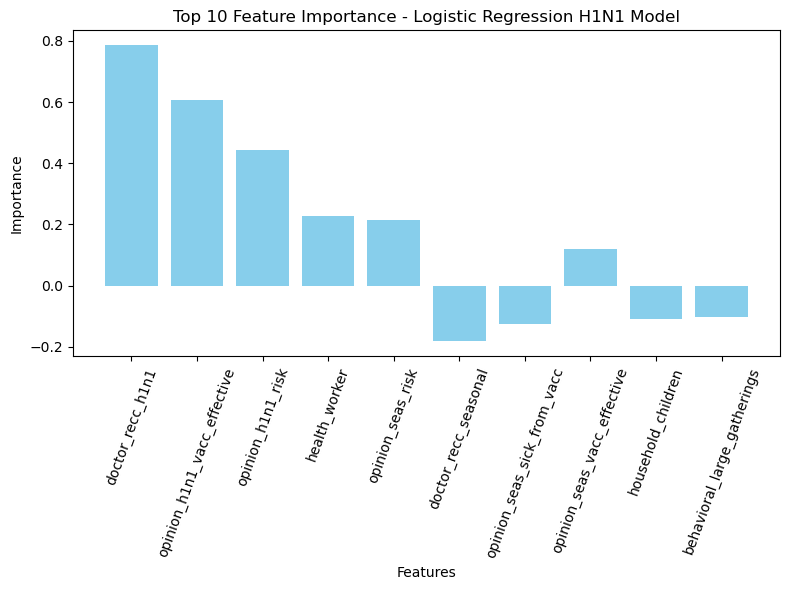

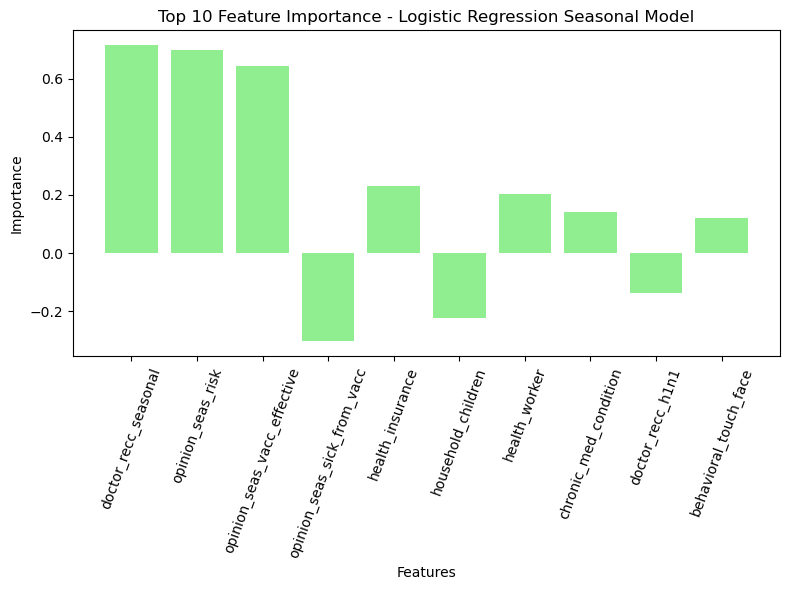

Training Data Summary:
Average AUC Score: 0.8297
Accuracy - H1N1: 0.832
Accuracy - Seasonal: 0.760
recall - H1N1: 0.407
recall - Seasonal: 0.716


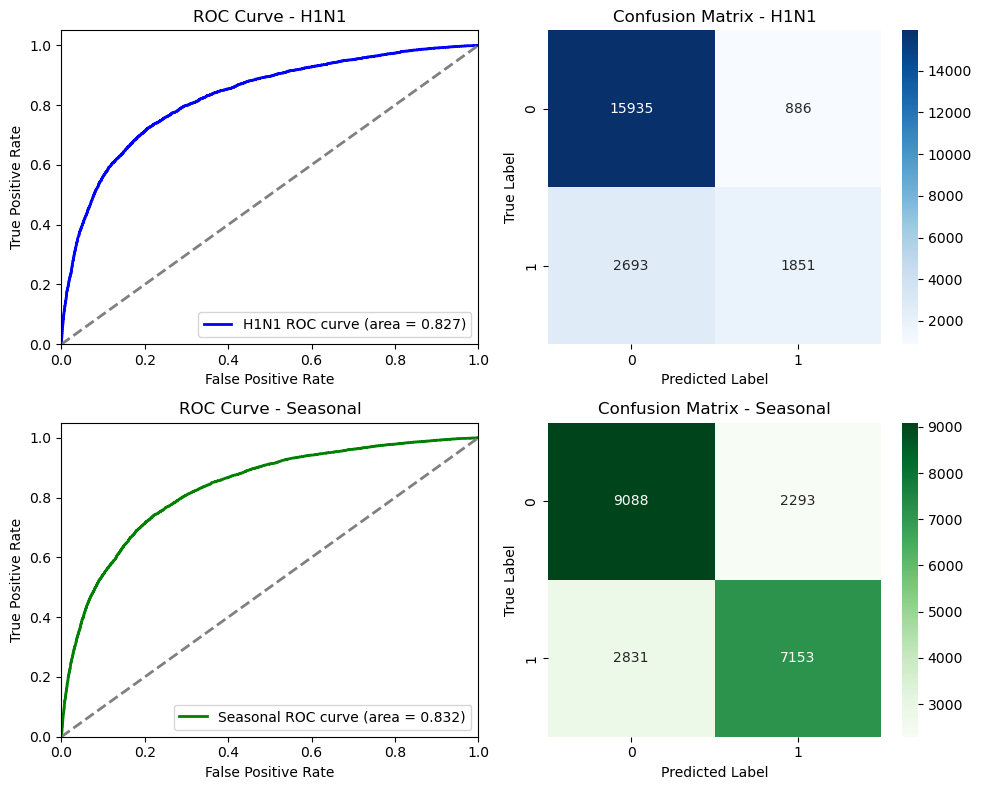

Testing Data Summary:
Average AUC Score: 0.8305
Accuracy - H1N1: 0.839
Accuracy - Seasonal: 0.768
recall - H1N1: 0.408
recall - Seasonal: 0.722


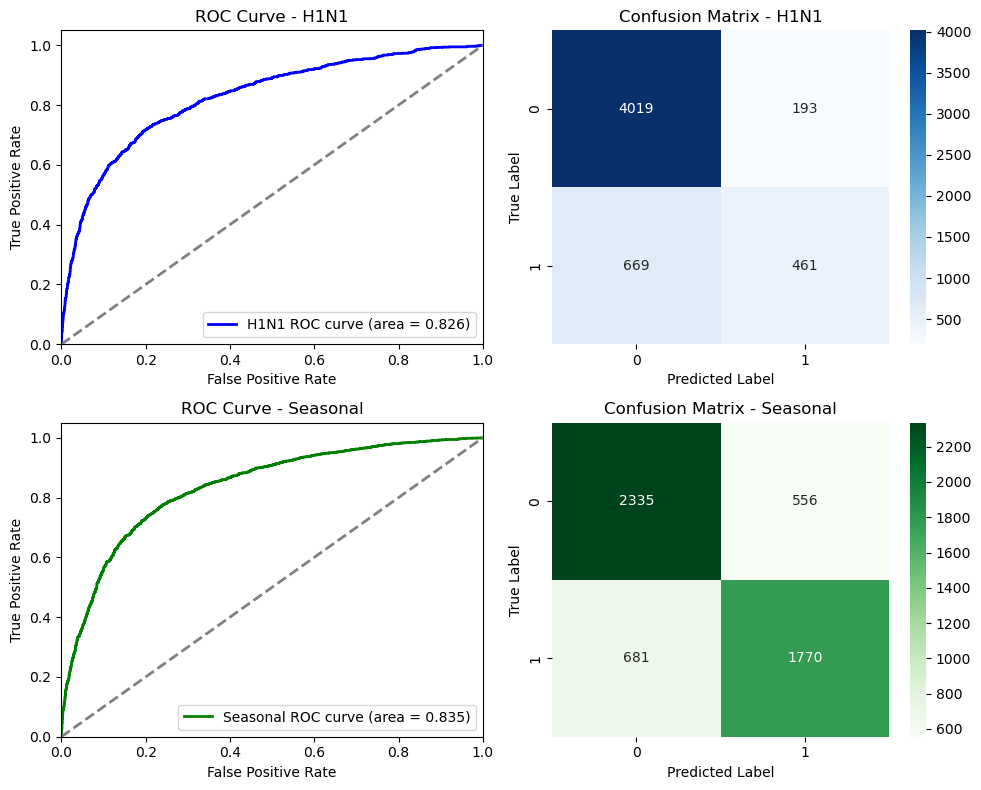

In [40]:
features_numerical_df = features_df.select_dtypes(include=['number'])
X_baseline_train, X_baseline_test, y_baseline_train, y_baseline_test = train_test_split(features_numerical_df, labels_df, test_size=0.2, random_state=42)

# Apply SimpleImputer to handle missing values
imputer = SimpleImputer(strategy='median')
X_baseline_train_imputed = imputer.fit_transform(X_baseline_train)
X_baseline_test_imputed = imputer.transform(X_baseline_test)

# Apply StandardScaler to scale the features
scaler = StandardScaler()
X_baseline_train_scaled = scaler.fit_transform(X_baseline_train_imputed)
X_baseline_test_scaled = scaler.transform(X_baseline_test_imputed)

# Train model for 'h1n1_vaccine'
h1n1_logreg = LogisticRegression(random_state=42)
h1n1_logreg.fit(X_baseline_train_scaled, y_baseline_train['h1n1_vaccine'])
y_h1n1_pred_train_proba = h1n1_logreg.predict_proba(X_baseline_train_scaled)
y_h1n1_pred_test_proba = h1n1_logreg.predict_proba(X_baseline_test_scaled)

# Train model for 'seasonal_vaccine'
seasonal_logreg = LogisticRegression(random_state=42)
seasonal_logreg.fit(X_baseline_train_scaled, y_baseline_train['seasonal_vaccine'])
y_seasonal_pred_train_proba = seasonal_logreg.predict_proba(X_baseline_train_scaled)
y_seasonal_pred_test_proba = seasonal_logreg.predict_proba(X_baseline_test_scaled)

# Function to plot feature importance
def plot_feature_importance(model, feature_names, model_name, color):
    importances = model.coef_[0]
    feature_importance = sorted(zip(feature_names, importances), key=lambda x: abs(x[1]), reverse=True)[:10]
    features, importances = zip(*feature_importance)
    
    plt.figure(figsize=(8, 6))
    bars = plt.bar(features, importances, align='center', color=color)
    plt.ylabel('Importance')
    plt.xlabel('Features')
    plt.title(f'Top 10 Feature Importance - {model_name}')
    plt.xticks(rotation=70)
    plt.savefig("png/Baseline_"+model_name+".png")
    plt.tight_layout()
    plt.show()

# Plot feature importance for 'h1n1_vaccine' model
plot_feature_importance(h1n1_logreg, X_baseline_train.columns, 'Logistic Regression H1N1 Model', 'skyblue')

# Plot feature importance for 'seasonal_vaccine' model (in green)
plot_feature_importance(seasonal_logreg, X_baseline_train.columns, 'Logistic Regression Seasonal Model', 'lightgreen')

model = "Baseline (LOGR)"

# Call the summary function for training data
print("Training Data Summary:")
summary(y_baseline_train['h1n1_vaccine'], y_baseline_train['seasonal_vaccine'], y_h1n1_pred_train_proba, y_seasonal_pred_train_proba, model)

# Call the summary function for testing data
print("Testing Data Summary:")
stats1 = summary(y_baseline_test['h1n1_vaccine'], y_baseline_test['seasonal_vaccine'], y_h1n1_pred_test_proba, y_seasonal_pred_test_proba, model)

### Correlation matrix

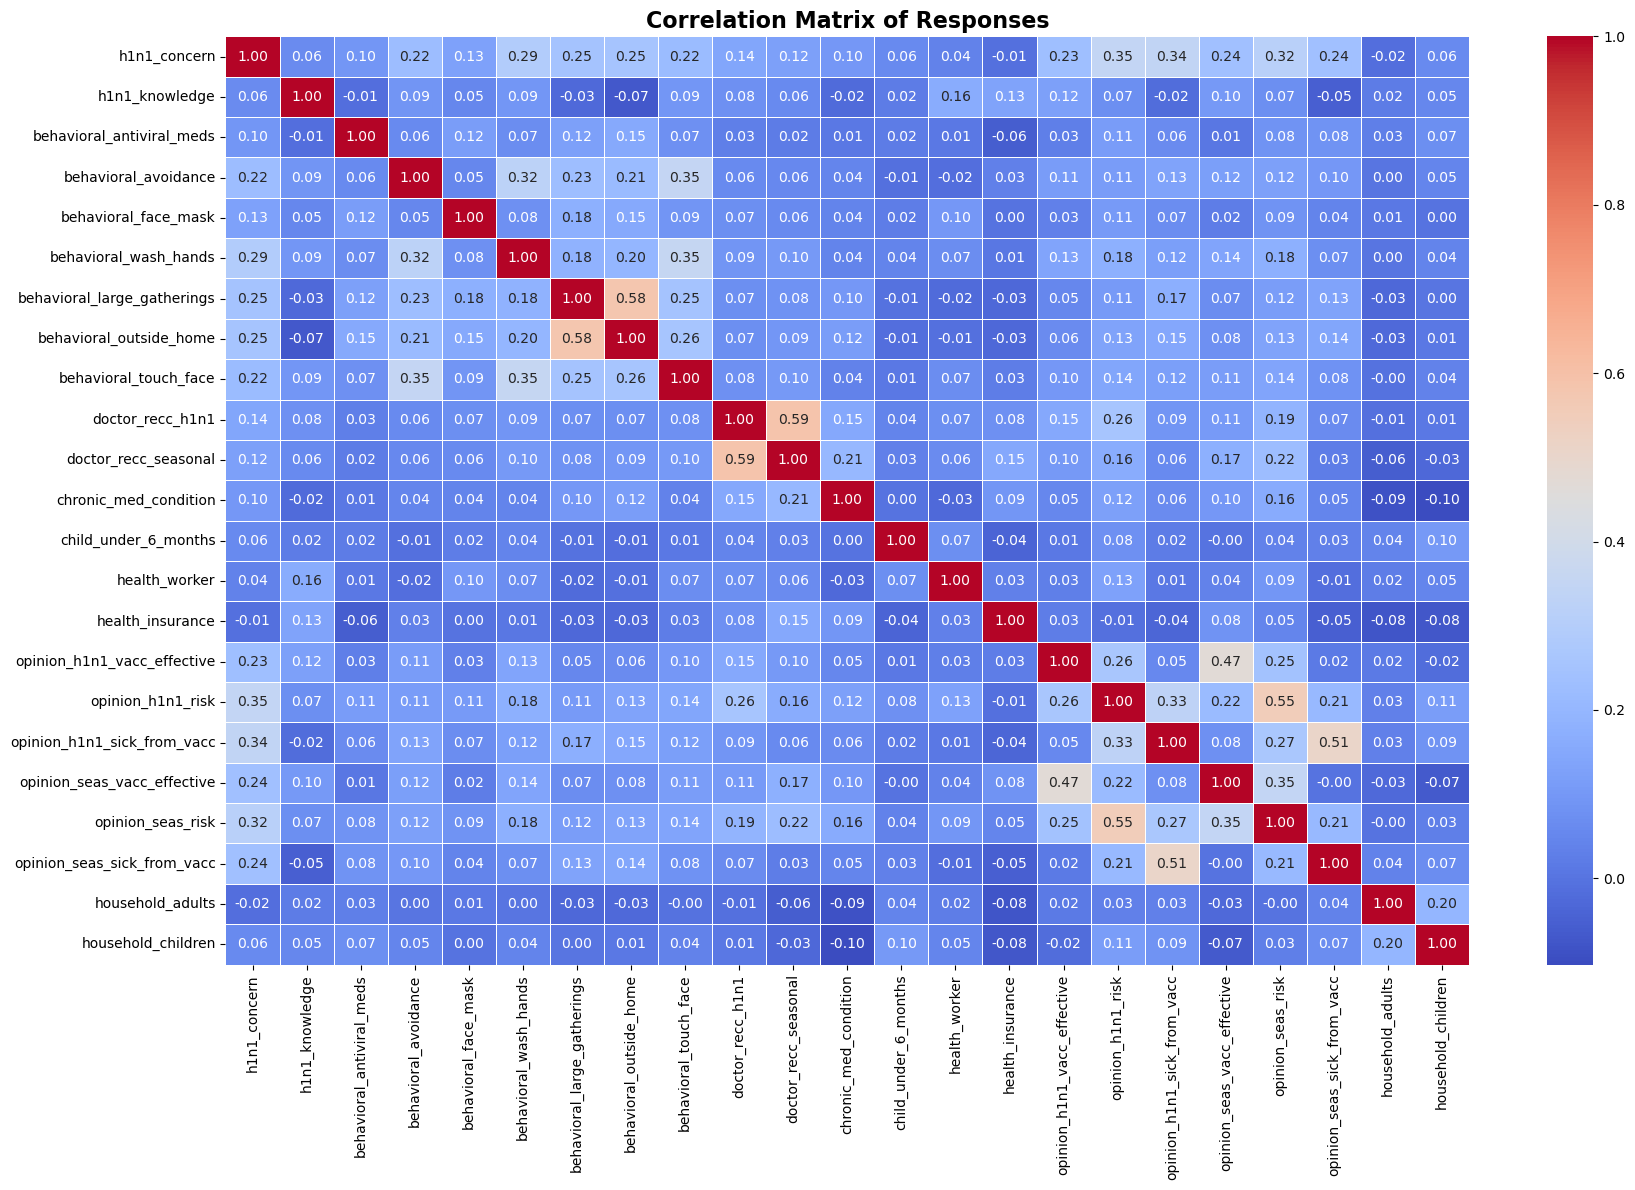

In [41]:
corr_df = pd.concat([X_baseline_train,y_baseline_train],axis=1)
corr_matrix = X_baseline_test.corr()

# Set up the matplotlib figure
plt.figure(figsize=(18, 12))

# Draw the heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

# Add title and adjust layout
plt.title('Correlation Matrix of Responses',weight="bold",fontsize=16)
plt.tight_layout()
plt.savefig("png/heatmap.png")
# Show plot
plt.show()

In [42]:
corr_pairs = corr_matrix.abs().unstack().sort_values(kind="quicksort", ascending=False)

# Remove the self correlations (i.e., 1.0 values on the diagonal)
corr_pairs = corr_pairs[corr_pairs < 1].drop_duplicates()

# Select the top 30 pairs
top_30_corr_pairs = corr_pairs.head(30)

# Display the top 30 correlated pairs
top_30_corr_pairs_df = top_30_corr_pairs.reset_index()
top_30_corr_pairs_df

level_0                      level_1         0
0              doctor_recc_h1n1         doctor_recc_seasonal  0.587394
1       behavioral_outside_home  behavioral_large_gatherings  0.581941
2             opinion_h1n1_risk            opinion_seas_risk  0.551561
3   opinion_seas_sick_from_vacc  opinion_h1n1_sick_from_vacc  0.505470
4   opinion_seas_vacc_effective  opinion_h1n1_vacc_effective  0.470059
5         behavioral_wash_hands        behavioral_touch_face  0.354619
6         behavioral_touch_face         behavioral_avoidance  0.352015
7                  h1n1_concern            opinion_h1n1_risk  0.347682
8   opinion_seas_vacc_effective            opinion_seas_risk  0.347658
9   opinion_h1n1_sick_from_vacc                 h1n1_concern  0.344438
10  opinion_h1n1_sick_from_vacc            opinion_h1n1_risk  0.331289
11        behavioral_wash_hands         behavioral_avoidance  0.324412
12                 h1n1_concern            opinion_seas_risk  0.315148
13        behavioral_wash_hands                 h1n1_concern  0.291596
14            opinion_seas_risk  opinion_h1n1_sick_from_vacc  0.267549
15  opinion_h1n1_vacc_effective            opinion_h1n1_risk  0.259502
16             doctor_recc_h1n1            opinion_h1n1_risk  0.258754
17        behavioral_touch_face      behavioral_outside_home  0.256699
18                 h1n1_concern      behavioral_outside_home  0.254307
19                 h1n1_concern  behavioral_large_gatherings  0.250678
20        behavioral_touch_face  behavioral_large_gatherings  0.247401
21            opinion_seas_risk  opinion_h1n1_vacc_effective  0.245221
22                 h1n1_concern  opinion_seas_vacc_effective  0.237507
23                 h1n1_concern  opinion_seas_sick_from_vacc  0.237181
24  opinion_h1n1_vacc_effective                 h1n1_concern  0.230388
25         behavioral_avoidance  behavioral_large_gatherings  0.225613
26         doctor_recc_seasonal            opinion_seas_risk  0.223614
27                 h1n1_concern         behavioral_avoidance  0.221444
28        behavioral_touch_face                 h1n1_concern  0.217998
29  opinion_seas_vacc_effective            opinion_h1n1_risk  0.215686

# Model 2 - Logistic Regression with Hyperparameter Tuning
Hyperparameter tuning of logistic regression improves the model's performance by optimizing parameters such as regularization strength and solver type.

Training Data Summary:
Average AUC Score: 0.8506
Accuracy - H1N1: 0.850
Accuracy - Seasonal: 0.776
recall - H1N1: 0.471
recall - Seasonal: 0.741


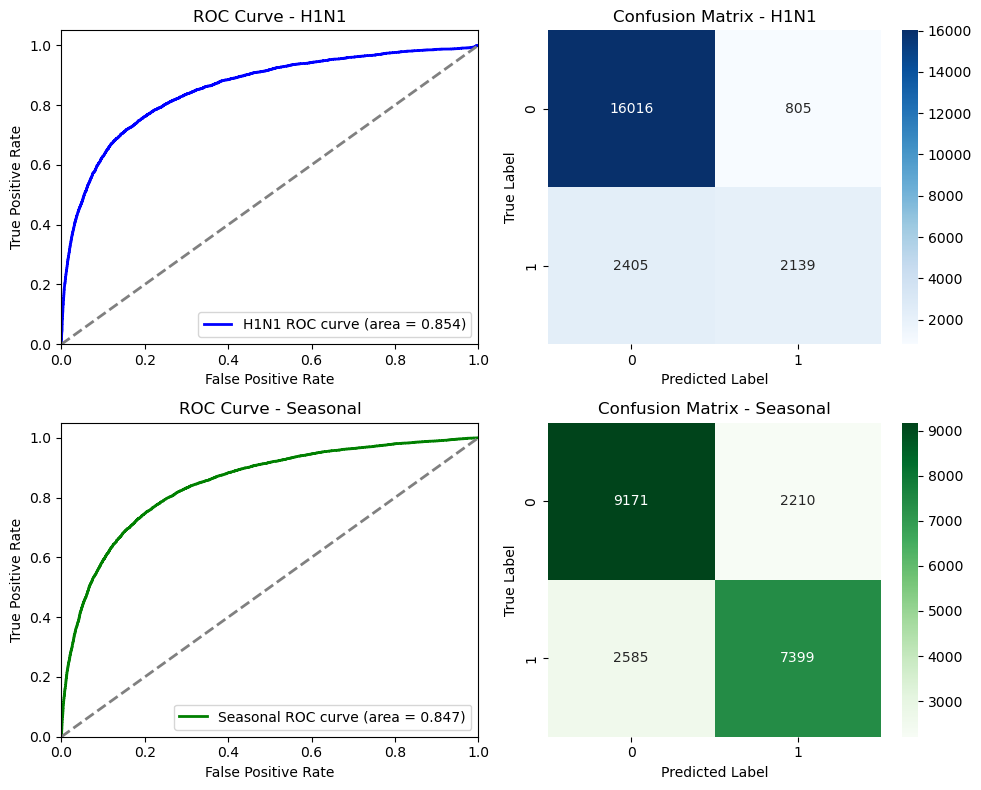

Testing Data Summary:
Average AUC Score: 0.8475
Accuracy - H1N1: 0.849
Accuracy - Seasonal: 0.780
recall - H1N1: 0.465
recall - Seasonal: 0.742


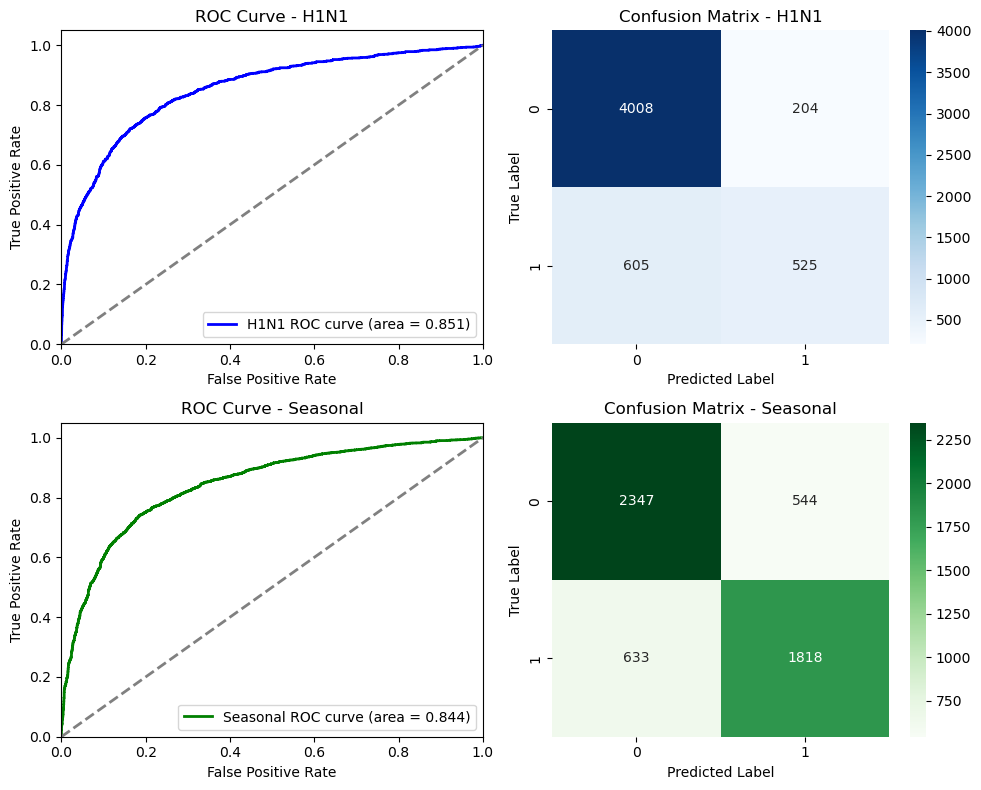

{'model': 'Logistic Regression',
 'accuracy_h1n1': 0.8485585922875327,
 'accuracy_seasonal': 0.7796705353800075,
 'roc_auc_h1n1': 0.8513120960761079,
 'roc_auc_seasonal': 0.8436930775048438}

In [43]:
# Preprocess for 'h1n1_vaccine'
X_train_log_reg_h1n1, X_test_log_reg_h1n1, y_train_log_reg_h1n1, y_test_log_reg_h1n1 = final_preprocessor(
    X_train, X_test, y_train['h1n1_vaccine'], y_test['h1n1_vaccine'],
    use_smote=False, 
    num_imputer_strategy='-1',
    cat_imputer_value='None',
    feature_selection_percent=100
)

# Preprocess for 'seasonal_vaccine'
X_train_log_reg_seasonal, X_test_log_reg_seasonal, y_train_log_reg_seasonal, y_test_log_reg_seasonal = final_preprocessor(
    X_train, X_test, y_train['seasonal_vaccine'], y_test['seasonal_vaccine'],
    use_smote=False, 
    num_imputer_strategy='-1',
    cat_imputer_value='None',
    feature_selection_percent=100
)

# Train model for 'h1n1_vaccine'
log_reg_h1n1 = LogisticRegression(random_state=42)
log_reg_h1n1.fit(X_train_log_reg_h1n1, y_train_log_reg_h1n1)

# Predictions and probabilities for 'h1n1_vaccine' - Train
y_pred_train_proba_h1n1 = log_reg_h1n1.predict_proba(X_train_log_reg_h1n1)

# Predictions and probabilities for 'h1n1_vaccine' - Test
y_pred_test_proba_h1n1 = log_reg_h1n1.predict_proba(X_test_log_reg_h1n1)

# Train model for 'seasonal_vaccine'
log_reg_seasonal = LogisticRegression(random_state=42)
log_reg_seasonal.fit(X_train_log_reg_seasonal, y_train_log_reg_seasonal)

# Predictions and probabilities for 'seasonal_vaccine' - Train
y_pred_train_proba_seasonal = log_reg_seasonal.predict_proba(X_train_log_reg_seasonal)

# Predictions and probabilities for 'seasonal_vaccine' - Test
y_pred_test_proba_seasonal = log_reg_seasonal.predict_proba(X_test_log_reg_seasonal)

# Call the summary function for training data

model = "Logistic Regression"

print("Training Data Summary:")
summary(y_train_log_reg_h1n1, y_train_log_reg_seasonal, y_pred_train_proba_h1n1, y_pred_train_proba_seasonal,model)

# Call the summary function for testing data
print("Testing Data Summary:")
summary(y_test_log_reg_h1n1, y_test_log_reg_seasonal, y_pred_test_proba_h1n1, y_pred_test_proba_seasonal,model)


In [44]:
"""
param_grid_search = [
    {
        'clf__penalty': ['l1'],
        'clf__C': [0.01, 0.1, 1, 10, 100],
        'clf__solver': ['liblinear'],
        'clf__class_weight': [None, 'balanced'],
        'clf__tol': [1e-4, 1e-3, 1e-2]
    },
    {
        'clf__penalty': ['l1'],
        'clf__C': [0.01, 0.1, 1, 10, 100],
        'clf__solver': ['saga'],
        'clf__class_weight': [None, 'balanced'],
        'clf__tol': [1e-4, 1e-3, 1e-2]
    },
    {
        'clf__penalty': ['l2'],
        'clf__C': [0.01, 0.1, 1, 10, 100],
        'clf__solver': ['newton-cg'],
        'clf__class_weight': [None, 'balanced'],
        'clf__tol': [1e-4, 1e-3, 1e-2]
    },
    {
        'clf__penalty': ['l2'],
        'clf__C': [0.01, 0.1, 1, 10, 100],
        'clf__solver': ['lbfgs'],
        'clf__class_weight': [None, 'balanced'],
        'clf__tol': [1e-4, 1e-3, 1e-2]
    },
    {
        'clf__penalty': ['l2'],
        'clf__C': [0.01, 0.1, 1, 10, 100],
        'clf__solver': ['sag'],
        'clf__class_weight': [None, 'balanced'],
        'clf__tol': [1e-4, 1e-3, 1e-2]
    },
    {
        'clf__penalty': ['l2'],
        'clf__C': [0.01, 0.1, 1, 10, 100],
        'clf__solver': ['saga'],
        'clf__class_weight': [None, 'balanced'],
        'clf__tol': [1e-4, 1e-3, 1e-2]
    },
    {
        'clf__penalty': ['elasticnet'],
        'clf__C': [0.01, 0.1, 1, 10, 100],
        'clf__solver': ['saga'],
        'clf__l1_ratio': [0.0, 0.25, 0.5, 0.75, 1.0],
        'clf__class_weight': [None, 'balanced'],
        'clf__tol': [1e-4, 1e-3, 1e-2]
    },
    {
        'clf__penalty': [None],
        'clf__C': [0.01, 0.1, 1, 10, 100],
        'clf__solver': ['newton-cg'],
        'clf__class_weight': [None, 'balanced'],
        'clf__tol': [1e-4, 1e-3, 1e-2]
    },
    {
        'clf__penalty': [None],
        'clf__C': [0.01, 0.1, 1, 10, 100],
        'clf__solver': ['lbfgs'],
        'clf__class_weight': [None, 'balanced'],
        'clf__tol': [1e-4, 1e-3, 1e-2]
    },
    {
        'clf__penalty': [None],
        'clf__C': [0.01, 0.1, 1, 10, 100],
        'clf__solver': ['sag'],
        'clf__class_weight': [None, 'balanced'],
        'clf__tol': [1e-4, 1e-3, 1e-2]
    },
    {
        'clf__penalty': [None],
        'clf__C': [0.01, 0.1, 1, 10, 100],
        'clf__solver': ['saga'],
        'clf__class_weight': [None, 'balanced'],
        'clf__tol': [1e-4, 1e-3, 1e-2]
    }
]
optimal_param_grid_seasonal = [
    {
        'clf__penalty': ['l1'],
        'clf__C': [0.01, 0.1, 1, 10, 100],
        'clf__solver': ['liblinear'],
        'clf__class_weight': [None, 'balanced'],
        'clf__tol': [1e-4, 1e-3, 1e-2]
    },
    {
        'clf__penalty': ['l1'],
        'clf__C': [0.01, 0.1, 1, 10, 100],
        'clf__solver': ['saga'],
        'clf__class_weight': [None, 'balanced'],
        'clf__tol': [1e-4, 1e-3, 1e-2]
    },
    {
        'clf__penalty': ['l2'],
        'clf__C': [0.01, 0.1, 1, 10, 100],
        'clf__solver': ['newton-cg'],
        'clf__class_weight': [None, 'balanced'],
        'clf__tol': [1e-4, 1e-3, 1e-2]
    },
    {
        'clf__penalty': ['l2'],
        'clf__C': [0.01, 0.1, 1, 10, 100],
        'clf__solver': ['lbfgs'],
        'clf__class_weight': [None, 'balanced'],
        'clf__tol': [1e-4, 1e-3, 1e-2]
    },
    {
        'clf__penalty': ['l2'],
        'clf__C': [0.01, 0.1, 1, 10, 100],
        'clf__solver': ['sag'],
        'clf__class_weight': [None, 'balanced'],
        'clf__tol': [1e-4, 1e-3, 1e-2]
    },
    {
        'clf__penalty': ['l2'],
        'clf__C': [0.01, 0.1, 1, 10, 100],
        'clf__solver': ['saga'],
        'clf__class_weight': [None, 'balanced'],
        'clf__tol': [1e-4, 1e-3, 1e-2]
    },
    {
        'clf__penalty': ['elasticnet'],
        'clf__C': [0.01, 0.1, 1, 10, 100],
        'clf__solver': ['saga'],
        'clf__l1_ratio': [0.0, 0.25, 0.5, 0.75, 1.0],
        'clf__class_weight': [None, 'balanced'],
        'clf__tol': [1e-4, 1e-3, 1e-2]
    },
    {
        'clf__penalty': [None],
        'clf__C': [0.01, 0.1, 1, 10, 100],
        'clf__solver': ['newton-cg'],
        'clf__class_weight': [None, 'balanced'],
        'clf__tol': [1e-4, 1e-3, 1e-2]
    },
    {
        'clf__penalty': [None],
        'clf__C': [0.01, 0.1, 1, 10, 100],
        'clf__solver': ['lbfgs'],
        'clf__class_weight': [None, 'balanced'],
        'clf__tol': [1e-4, 1e-3, 1e-2]
    },
    {
        'clf__penalty': [None],
        'clf__C': [0.01, 0.1, 1, 10, 100],
        'clf__solver': ['sag'],
        'clf__class_weight': [None, 'balanced'],
        'clf__tol': [1e-4, 1e-3, 1e-2]
    },
    {
        'clf__penalty': [None],
        'clf__C': [0.01, 0.1, 1, 10, 100],
        'clf__solver': ['saga'],
        'clf__class_weight': [None, 'balanced'],
        'clf__tol': [1e-4, 1e-3, 1e-2]
    }
]
"""

"\nparam_grid_search = [\n    {\n        'clf__penalty': ['l1'],\n        'clf__C': [0.01, 0.1, 1, 10, 100],\n        'clf__solver': ['liblinear'],\n        'clf__class_weight': [None, 'balanced'],\n        'clf__tol': [1e-4, 1e-3, 1e-2]\n    },\n    {\n        'clf__penalty': ['l1'],\n        'clf__C': [0.01, 0.1, 1, 10, 100],\n        'clf__solver': ['saga'],\n        'clf__class_weight': [None, 'balanced'],\n        'clf__tol': [1e-4, 1e-3, 1e-2]\n    },\n    {\n        'clf__penalty': ['l2'],\n        'clf__C': [0.01, 0.1, 1, 10, 100],\n        'clf__solver': ['newton-cg'],\n        'clf__class_weight': [None, 'balanced'],\n        'clf__tol': [1e-4, 1e-3, 1e-2]\n    },\n    {\n        'clf__penalty': ['l2'],\n        'clf__C': [0.01, 0.1, 1, 10, 100],\n        'clf__solver': ['lbfgs'],\n        'clf__class_weight': [None, 'balanced'],\n        'clf__tol': [1e-4, 1e-3, 1e-2]\n    },\n    {\n        'clf__penalty': ['l2'],\n        'clf__C': [0.01, 0.1, 1, 10, 100],\n        'clf__s

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END clf__C=1, clf__class_weight=None, clf__max_iter=100, clf__penalty=l2, clf__solver=liblinear, clf__tol=0.1;, score=0.842 total time=   0.1s
[CV 3/5] END clf__C=1, clf__class_weight=None, clf__max_iter=100, clf__penalty=l2, clf__solver=liblinear, clf__tol=0.1;, score=0.852 total time=   0.1s
[CV 2/5] END clf__C=1, clf__class_weight=None, clf__max_iter=100, clf__penalty=l2, clf__solver=liblinear, clf__tol=0.1;, score=0.849 total time=   0.1s
[CV 5/5] END clf__C=1, clf__class_weight=None, clf__max_iter=100, clf__penalty=l2, clf__solver=liblinear, clf__tol=0.1;, score=0.850 total time=   0.1s
[CV 4/5] END clf__C=1, clf__class_weight=None, clf__max_iter=100, clf__penalty=l2, clf__solver=liblinear, clf__tol=0.1;, score=0.848 total time=   0.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 5/5] END clf__C=1, clf__class_weight=None, clf__max_iter=100, clf__penalty=l2, clf__solver=lbfgs, clf__tol=0.0001;, sc

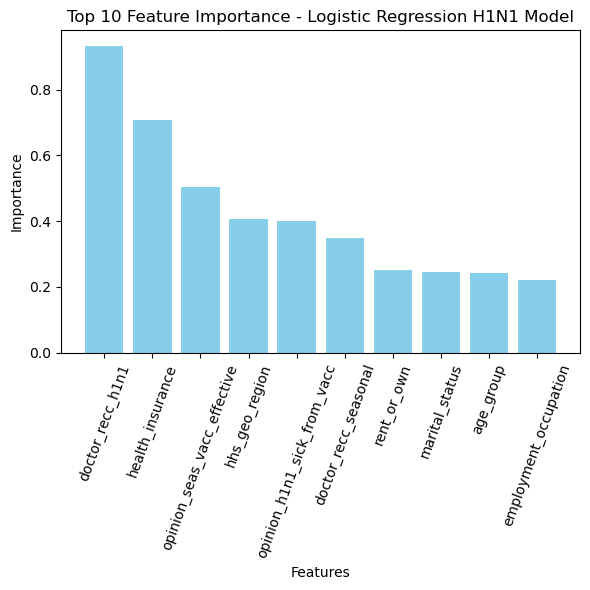

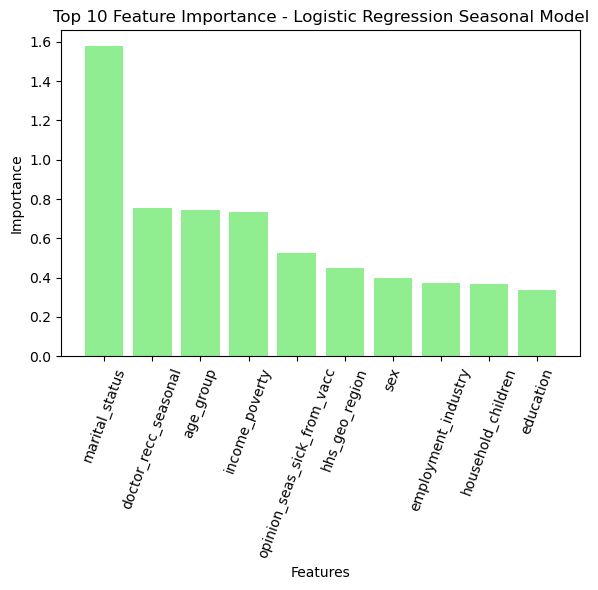

Average AUC Score: 0.8475
Accuracy - H1N1: 0.849
Accuracy - Seasonal: 0.780
recall - H1N1: 0.465
recall - Seasonal: 0.742


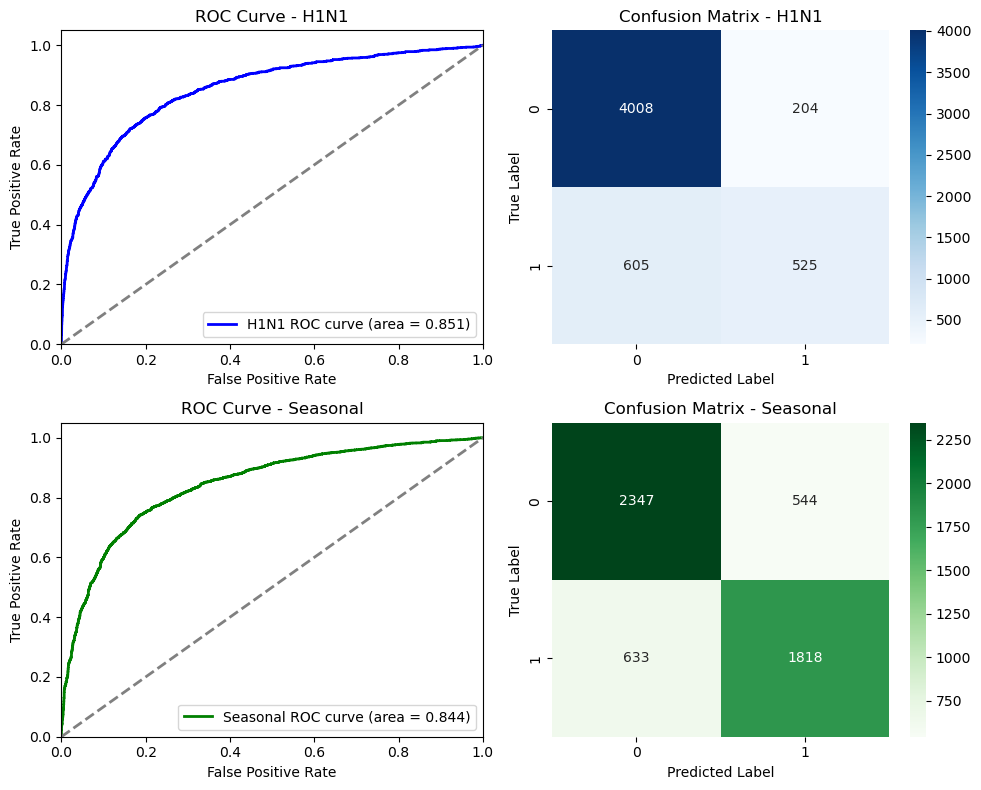

In [45]:
pipeline_h1n1 = Pipeline([
    ('clf', LogisticRegression(random_state=42, max_iter=2000))
])

pipeline_seasonal = Pipeline([
    ('clf', LogisticRegression(random_state=42, max_iter=2000))
])

# Define the optimal parameter grid for each pipeline
optimal_param_grid_h1n1 = {
    'clf__C': [1], 
    'clf__class_weight': [None],
    'clf__max_iter': [100],
    'clf__penalty': ['l2'],
    'clf__solver': ['liblinear'],
    'clf__tol': [0.1]
}

optimal_param_grid_seasonal = {
    'clf__C': [1], 
    'clf__class_weight': [None],
    'clf__max_iter': [100],
    'clf__penalty': ['l2'],
    'clf__solver': ['lbfgs'],
    'clf__tol': [0.0001]
}

# Setup GridSearchCV for both h1n1_vaccine and seasonal_vaccine
grid_search_h1n1 = GridSearchCV(pipeline_h1n1, param_grid=optimal_param_grid_h1n1, cv=5, n_jobs=-1, verbose=5, error_score='raise')
grid_search_seasonal = GridSearchCV(pipeline_seasonal, param_grid=optimal_param_grid_seasonal, cv=5, n_jobs=-1, verbose=5, error_score='raise')

# Fit GridSearchCV for both h1n1_vaccine and seasonal_vaccine
grid_search_h1n1.fit(X_train_log_reg_h1n1, y_train_log_reg_h1n1)
grid_search_seasonal.fit(X_train_log_reg_seasonal, y_train_log_reg_seasonal)

# Get the best models for both h1n1_vaccine and seasonal_vaccine
best_model_h1n1 = grid_search_h1n1.best_estimator_
best_model_seasonal = grid_search_seasonal.best_estimator_

# Get feature importances for H1N1 model
importance_h1n1 = best_model_h1n1.steps[-1][1].coef_[0]
feature_names = X_train.columns
feature_importance_h1n1 = sorted(zip(feature_names, importance_h1n1), key=lambda x: abs(x[1]), reverse=True)

# Extract top 10 features and importances for H1N1 model
top_features_h1n1 = feature_importance_h1n1[:10]
features_h1n1, importances_h1n1 = zip(*top_features_h1n1)

# Plotting top 10 feature importances for H1N1 model rotated 90 degrees counter-clockwise with rotated x ticks
plt.figure(figsize=(6, 6))
bars = plt.bar(features_h1n1, np.abs(importances_h1n1), align='center', color='skyblue')  # Use np.abs() to ensure absolute values
plt.ylabel('Importance')
plt.xlabel('Features')
plt.title('Top 10 Feature Importance - Logistic Regression H1N1 Model')
plt.xticks(rotation=70)  # Rotate x ticks by 70 degrees for better readability
plt.tight_layout()  # Adjust layout to prevent overlap of labels
plt.savefig("png/h1n1_feature_importance.png")  # Save the plot as PNG
plt.show()

# Get feature importances for Seasonal model
importance_seasonal = best_model_seasonal.steps[-1][1].coef_[0]
feature_importance_seasonal = sorted(zip(feature_names, importance_seasonal), key=lambda x: abs(x[1]), reverse=True)

# Extract top 10 features and importances for Seasonal model
top_features_seasonal = feature_importance_seasonal[:10]
features_seasonal, importances_seasonal = zip(*top_features_seasonal)

# Plotting top 10 feature importances for Seasonal model rotated 90 degrees counter-clockwise with rotated x ticks
plt.figure(figsize=(6, 6))
bars = plt.bar(features_seasonal, np.abs(importances_seasonal), align='center', color='lightgreen')  # Use np.abs() to ensure absolute values
plt.ylabel('Importance')
plt.xlabel('Features')
plt.title('Top 10 Feature Importance - Logistic Regression Seasonal Model')
plt.xticks(rotation=70)  # Rotate x ticks by 70 degrees for better readability
plt.tight_layout()  # Adjust layout to prevent overlap of labels
plt.savefig("png/seasonal_feature_importance.png")  # Save the plot as PNG
plt.show()

# Assuming `summary` is a function you have defined to print or store model performance metrics
model = "Logistic Regression"
stats2 = summary(y_test_log_reg_h1n1, y_test_log_reg_seasonal, y_pred_test_proba_h1n1, y_pred_test_proba_seasonal,model)

# Model 3 - Decision Tree with Hyperparameter Tuning
Decision trees are explored to capture non-linear relationships in the data. Hyperparameter tuning is performed to find the optimal tree depth and minimum samples for splitting.

Best parameters found: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 9, 'min_samples_split': 4}
Best parameters found: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 9, 'min_samples_split': 4}
Training Data Summary:
Average AUC Score: 0.8528
Accuracy - H1N1: 0.854
Accuracy - Seasonal: 0.770
recall - H1N1: 0.497
recall - Seasonal: 0.705


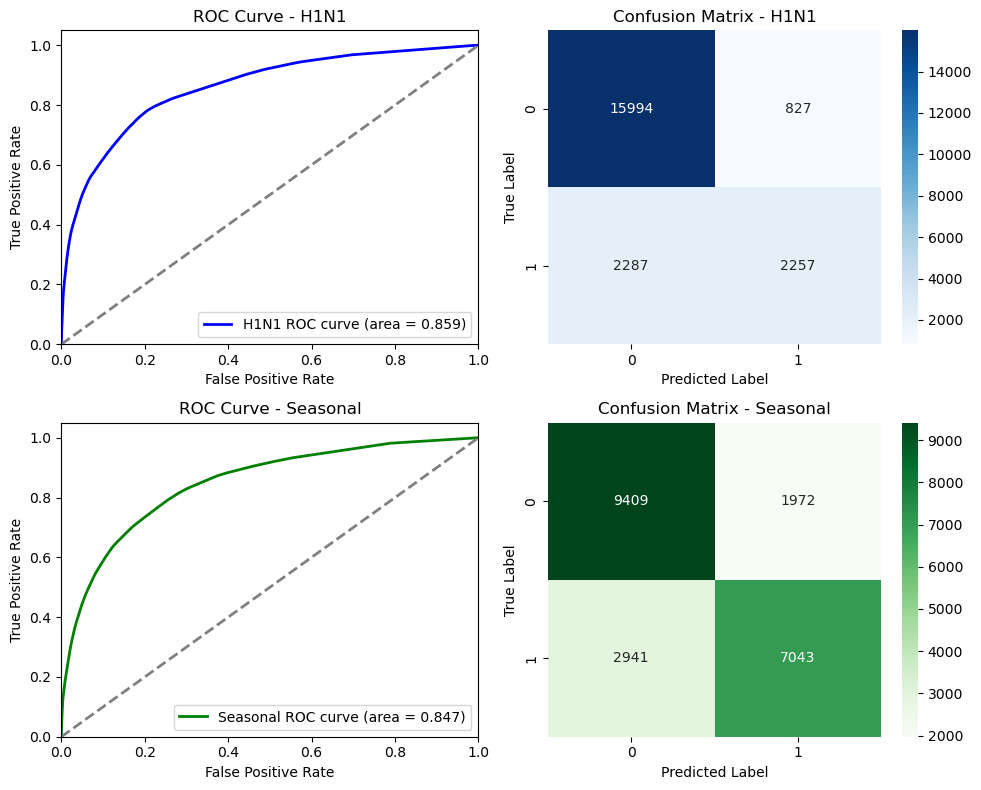

Testing Data Summary:
Average AUC Score: 0.8442
Accuracy - H1N1: 0.850
Accuracy - Seasonal: 0.764
recall - H1N1: 0.483
recall - Seasonal: 0.697


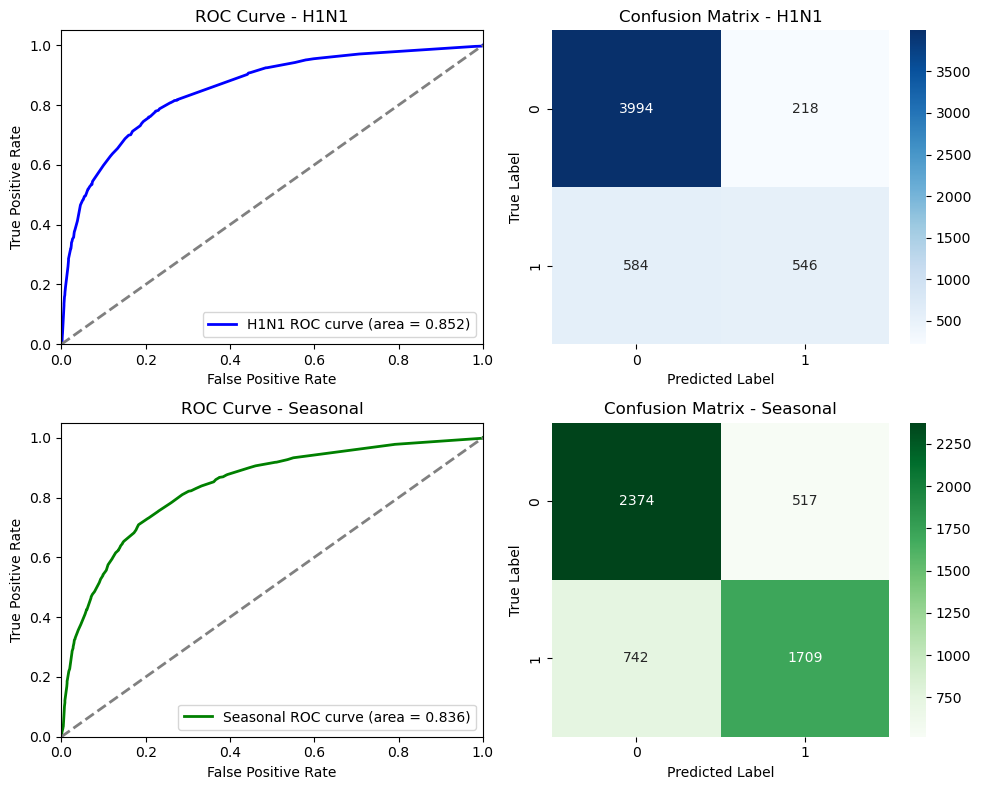

In [46]:
# Preprocess the data for 'h1n1_vaccine'
X_train_dtree_h1n1, X_test_dtree_h1n1, y_train_dtree_h1n1, y_test_dtree_h1n1 = final_preprocessor(
    X_train, X_test, y_train['h1n1_vaccine'], y_test['h1n1_vaccine'], 
    use_smote=False, 
    num_imputer_strategy='-1',
    cat_imputer_value='None',
    feature_selection_percent=30
)

# Preprocess the data for 'seasonal_vaccine'
X_train_dtree_seasonal, X_test_dtree_seasonal, y_train_dtree_seasonal, y_test_dtree_seasonal = final_preprocessor(
    X_train, X_test, y_train['seasonal_vaccine'], y_test['seasonal_vaccine'], 
    use_smote=False,
    num_imputer_strategy='-1',
    cat_imputer_value='None',
    feature_selection_percent=30
)

# Define the parameter grid for grid search
param_grid_search = {
    'max_depth': range(5, 16),
    'min_samples_split': range(2, 11),
    'min_samples_leaf': range(1, 7),
    'criterion': ['gini', 'entropy']
}
param_grid = {
    'max_depth': [6, 7],
    'min_samples_split': [4, 6],
    'min_samples_leaf': [2, 9],
    'criterion': ['gini']
}

# Set up the grid search for 'h1n1_vaccine'
grid_search_h1n1 = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='roc_auc',
    n_jobs=-1
)

# Fit the grid search to the data
grid_search_h1n1.fit(X_train_dtree_h1n1, y_train_dtree_h1n1)

# Get the best estimator for 'h1n1_vaccine'
best_dt_h1n1 = grid_search_h1n1.best_estimator_

# Predictions and probabilities for 'h1n1_vaccine' - Train
y_pred_train_proba_dtree_h1n1 = best_dt_h1n1.predict_proba(X_train_dtree_h1n1)

# Predictions and probabilities for 'h1n1_vaccine' - Test
y_pred_test_proba_dtree_h1n1 = best_dt_h1n1.predict_proba(X_test_dtree_h1n1)

# Set up the grid search for 'seasonal_vaccine'
grid_search_seasonal = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='roc_auc',
    n_jobs=-1
)

# Fit the grid search to the data
grid_search_seasonal.fit(X_train_dtree_seasonal, y_train_dtree_seasonal)

# Get the best estimator for 'seasonal_vaccine'
best_dt_seasonal = grid_search_seasonal.best_estimator_

# Predictions and probabilities for 'seasonal_vaccine' - Train
y_pred_train_proba_dtree_seasonal = best_dt_seasonal.predict_proba(X_train_dtree_seasonal)

# Predictions and probabilities for 'seasonal_vaccine' - Test
y_pred_test_proba_dtree_seasonal = best_dt_seasonal.predict_proba(X_test_dtree_seasonal)

# Example usage with the grid searches performed
report_best_params(grid_search_h1n1)
report_best_params(grid_search_seasonal)

model = "Decison Tree"

# Call the summary function for training data
print("Training Data Summary:")
summary(y_train_dtree_h1n1, y_train_dtree_seasonal, y_pred_train_proba_dtree_h1n1, y_pred_train_proba_dtree_seasonal,model)

# Call the summary function for testing data
print("Testing Data Summary:")
stats3 = summary(y_test_dtree_h1n1, y_test_dtree_seasonal, y_pred_test_proba_dtree_h1n1, y_pred_test_proba_dtree_seasonal,model)


# Model 4 - LightGBM

### About LightGBM
LightGBM (Light Gradient Boosting Machine) is a powerful and efficient implementation of the gradient boosting framework. It is designed to be fast and high-performing, particularly on large datasets. LightGBM builds decision trees sequentially, where each tree corrects the errors of the previous one, and it optimizes for speed and memory usage.

### Why We Chose It 
LightGBM was chosen for its efficiency and ability to handle large datasets with high dimensionality, making it well-suited for our classification task.

We used the Lazy Predict library to profile various machine learning models and verify their performance. Although we were already using LightGBM, the Lazy Predict profiler confirmed its strong performance relative to other models. Based on these results, we decided to focus more on LightGBM to leverage its high accuracy and efficiency in our predictive modeling efforts.

This focus even let us beat out the score of someone who was high in the leaderboard already and had used CatBoost!

In [47]:
# Function to clean column names
def clean_column_names(df):
    df.columns = df.columns.str.replace('[^A-Za-z0-9_]+', '_', regex=True)
    return df

run_lgbm_gridsearch = False
#this can take 4+ hours
if run_lgbm_gridsearch:
    # Clean the feature names in the original data
    X_train_clean = clean_column_names(X_train)
    X_test_clean = clean_column_names(X_test)

    # Verify column names after cleaning
    print("Column names after cleaning:", X_train_clean.columns)

    # Check if the number of columns match
    if X_train_clean.shape[1] != X_test_clean.shape[1]:
        raise ValueError("Mismatch in the number of columns between training and testing data.")

    # Preprocess the data for 'h1n1_vaccine'
    X_train_lgbm_h1n1, X_test_lgbm_h1n1, y_train_lgbm_h1n1, y_test_lgbm_h1n1 = final_preprocessor(
        X_train_clean, X_test_clean, y_train['h1n1_vaccine'], y_test['h1n1_vaccine'], use_smote=False
    )

    # Preprocess the data for 'seasonal_vaccine'
    X_train_lgbm_seasonal, X_test_lgbm_seasonal, y_train_lgbm_seasonal, y_test_lgbm_seasonal = final_preprocessor(
        X_train_clean, X_test_clean, y_train['seasonal_vaccine'], y_test['seasonal_vaccine'], use_smote=False
    )

    # Check the shapes of the preprocessed feature sets
    print("Shape of 'h1n1_vaccine' training set:", X_train_lgbm_h1n1.shape)
    print("Shape of 'h1n1_vaccine' test set:", X_test_lgbm_h1n1.shape)
    print("Shape of 'seasonal_vaccine' training set:", X_train_lgbm_seasonal.shape)
    print("Shape of 'seasonal_vaccine' test set:", X_test_lgbm_seasonal.shape)

    # Define a reduced parameter grid for GridSearchCV
    param_grid = {
        'num_leaves': [31, 50, 70],
        'learning_rate': [0.1, 0.01,.001],
        'n_estimators': [100, 200]
    }

    # Initialize the LGBMClassifier
    lgbm_h1n1 = LGBMClassifier(random_state=42)
    lgbm_seasonal = LGBMClassifier(random_state=42)

    # GridSearchCV for 'h1n1_vaccine' with reduced parameter grid and fewer CV folds
    grid_search_h1n1 = GridSearchCV(estimator=lgbm_h1n1, param_grid=param_grid, cv=3, scoring='roc_auc', verbose=2, n_jobs=-1)
    grid_search_h1n1.fit(X_train_lgbm_h1n1, y_train_lgbm_h1n1)

    # GridSearchCV for 'seasonal_vaccine' with reduced parameter grid and fewer CV folds
    grid_search_seasonal = GridSearchCV(estimator=lgbm_seasonal, param_grid=param_grid, cv=3, scoring='roc_auc', verbose=2, n_jobs=-1)
    grid_search_seasonal.fit(X_train_lgbm_seasonal, y_train_lgbm_seasonal)

    # Best estimators
    best_lgbm_h1n1 = grid_search_h1n1.best_estimator_
    best_lgbm_seasonal = grid_search_seasonal.best_estimator_

    # Predictions and probabilities for 'h1n1_vaccine'
    y_pred_lgbm_h1n1 = best_lgbm_h1n1.predict(X_test_lgbm_h1n1)
    y_pred_proba_lgbm_h1n1 = best_lgbm_h1n1.predict_proba(X_test_lgbm_h1n1)

    # Predictions and probabilities for 'seasonal_vaccine'
    y_pred_lgbm_seasonal = best_lgbm_seasonal.predict(X_test_lgbm_seasonal)
    y_pred_proba_lgbm_seasonal = best_lgbm_seasonal.predict_proba(X_test_lgbm_seasonal)

    # Example usage with the grid searches performed
    report_best_params(grid_search_h1n1)
    report_best_params(grid_search_seasonal)
    model = "LGBM"
    # Use the summary function to output results
    summary(y_test_lgbm_h1n1, y_test_lgbm_seasonal, y_pred_proba_lgbm_h1n1, y_pred_proba_lgbm_seasonal,model)

### LightGBM 5 hour run output
<img src="images/lightgbm_5hour.png">

Best parameters found: {'learning_rate': 0.01, 'n_estimators': 200, 'num_leaves': 70}

Best parameters found: {'learning_rate': 0.1, 'n_estimators': 100, 'num_leaves': 31}

Average AUC Score: 0.8501


Unfortunately our 5 hour run didn't do better than teh default parameters!  however we can compare this to the default params and see if we can try to get this score up very slightly in the next cell

### LightGBM Core run

Column names after cleaning: Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')
Shape of 'h1n1_vaccine' training set: (33642, 98)
Shape of 'h1n1_vaccine' test set: (5342, 98)
Shape of 'seasonal_

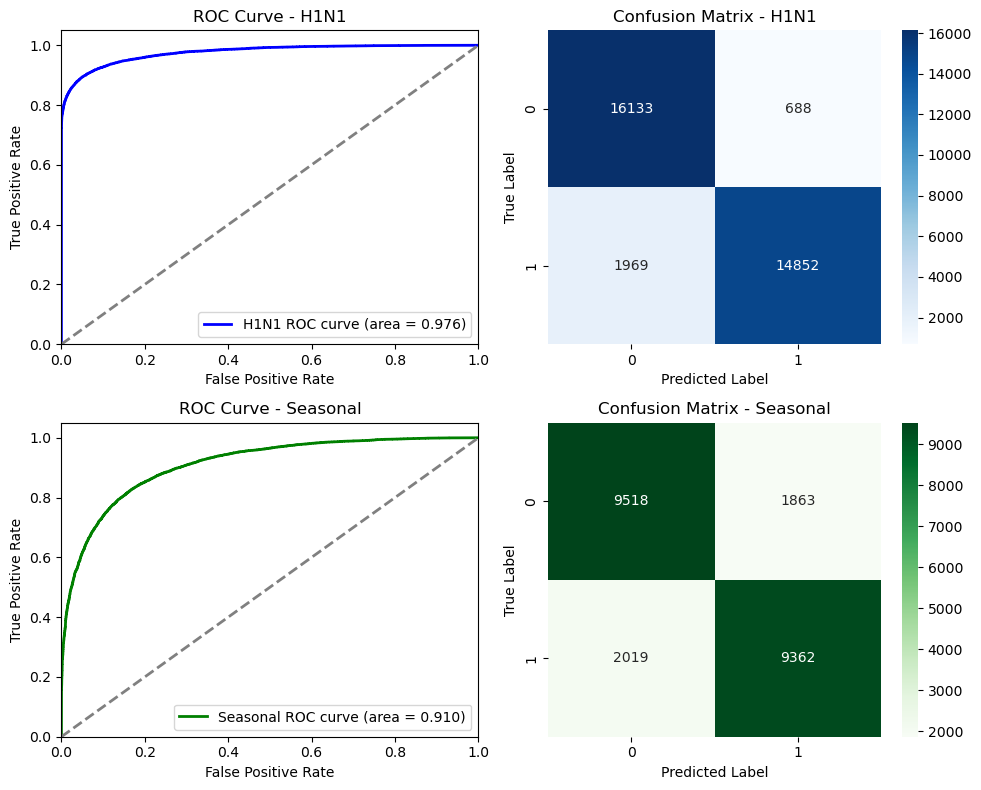

Testing Data Summary:
Average AUC Score: 0.8679
Accuracy - H1N1: 0.854
Accuracy - Seasonal: 0.793
recall - H1N1: 0.514
recall - Seasonal: 0.767


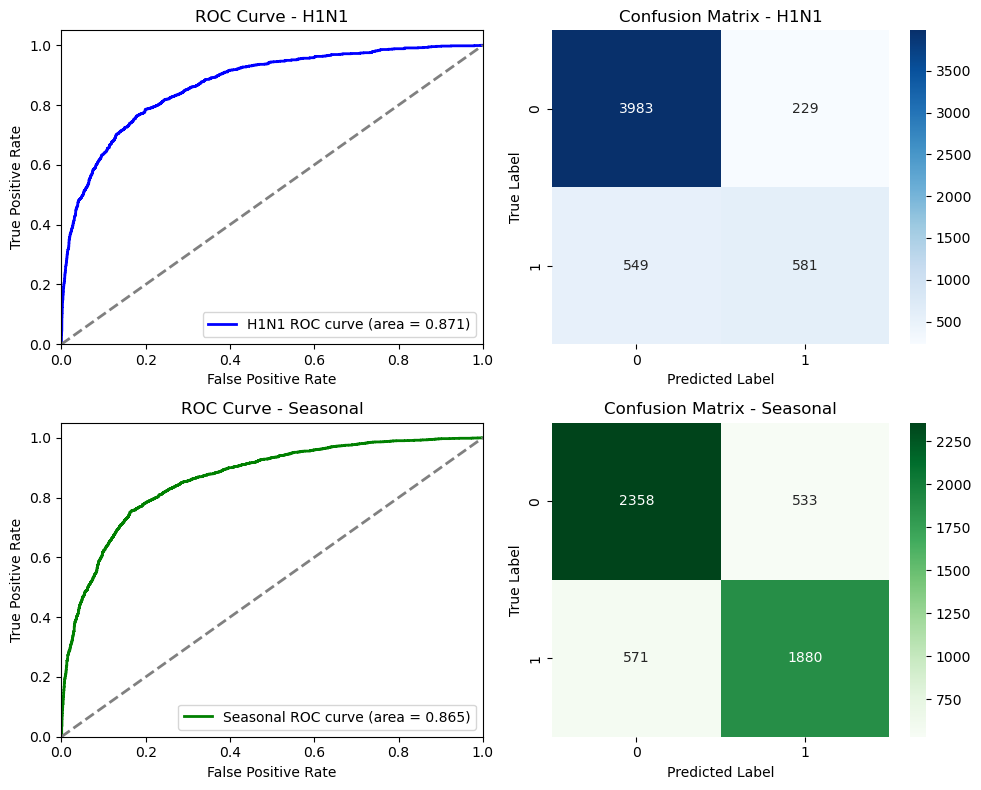

In [48]:
# Function to clean column names
def clean_column_names(df):
    df.columns = df.columns.str.replace('[^A-Za-z0-9_]+', '_', regex=True)
    return df

# Clean the feature names in the original data
X_train_clean = clean_column_names(X_train)
X_test_clean = clean_column_names(X_test)

# Verify column names after cleaning
print("Column names after cleaning:", X_train_clean.columns)

# Check if the number of columns match
if X_train_clean.shape[1] != X_test_clean.shape[1]:
    raise ValueError("Mismatch in the number of columns between training and testing data.")

# Preprocess the data for 'h1n1_vaccine'
X_train_lgbm_h1n1, X_test_lgbm_h1n1, y_train_lgbm_h1n1, y_test_lgbm_h1n1 = final_preprocessor(
    X_train_clean, X_test_clean, y_train['h1n1_vaccine'], y_test['h1n1_vaccine'], 
    use_smote=True,
    num_imputer_strategy='-1',
    cat_imputer_value='None',
    feature_selection_percent=87
)

# Preprocess the data for 'seasonal_vaccine'
X_train_lgbm_seasonal, X_test_lgbm_seasonal, y_train_lgbm_seasonal, y_test_lgbm_seasonal = final_preprocessor(
    X_train_clean, X_test_clean, y_train['seasonal_vaccine'], y_test['seasonal_vaccine'], 
    use_smote=True,
    num_imputer_strategy='-1',
    cat_imputer_value='None',
    feature_selection_percent=87
)

# Check the shapes of the preprocessed feature sets
print("Shape of 'h1n1_vaccine' training set:", X_train_lgbm_h1n1.shape)
print("Shape of 'h1n1_vaccine' test set:", X_test_lgbm_h1n1.shape)
print("Shape of 'seasonal_vaccine' training set:", X_train_lgbm_seasonal.shape)
print("Shape of 'seasonal_vaccine' test set:", X_test_lgbm_seasonal.shape)

# Initialize and train the LGBMClassifier for 'h1n1_vaccine'
lgbm_h1n1 = LGBMClassifier(random_state=42, reg_alpha=.1)
try:
    lgbm_h1n1.fit(X_train_lgbm_h1n1, y_train_lgbm_h1n1)
except Exception as e:
    print("Error training LGBMClassifier for 'h1n1_vaccine':", e)

# Predictions and probabilities for 'h1n1_vaccine' - Train
y_pred_train_proba_lgbm_h1n1 = lgbm_h1n1.predict_proba(X_train_lgbm_h1n1)

# Predictions and probabilities for 'h1n1_vaccine' - Test
y_pred_test_proba_lgbm_h1n1 = lgbm_h1n1.predict_proba(X_test_lgbm_h1n1)

# Initialize and train the LGBMClassifier for 'seasonal_vaccine'
lgbm_seasonal = LGBMClassifier(random_state=42, reg_alpha=.1)
try:
    lgbm_seasonal.fit(X_train_lgbm_seasonal, y_train_lgbm_seasonal)
except Exception as e:
    print("Error training LGBMClassifier for 'seasonal_vaccine':", e)

# Predictions and probabilities for 'seasonal_vaccine' - Train
y_pred_train_proba_lgbm_seasonal = lgbm_seasonal.predict_proba(X_train_lgbm_seasonal)

# Predictions and probabilities for 'seasonal_vaccine' - Test
y_pred_test_proba_lgbm_seasonal = lgbm_seasonal.predict_proba(X_test_lgbm_seasonal)

model = "LGBM"

# Use the summary function to output results for training data
print("Training Data Summary:")
summary(y_train_lgbm_h1n1, y_train_lgbm_seasonal, y_pred_train_proba_lgbm_h1n1, y_pred_train_proba_lgbm_seasonal,model)

# Use the summary function to output results for testing data
print("Testing Data Summary:")
stats6 = summary(y_test_lgbm_h1n1, y_test_lgbm_seasonal, y_pred_test_proba_lgbm_h1n1, y_pred_test_proba_lgbm_seasonal,model)


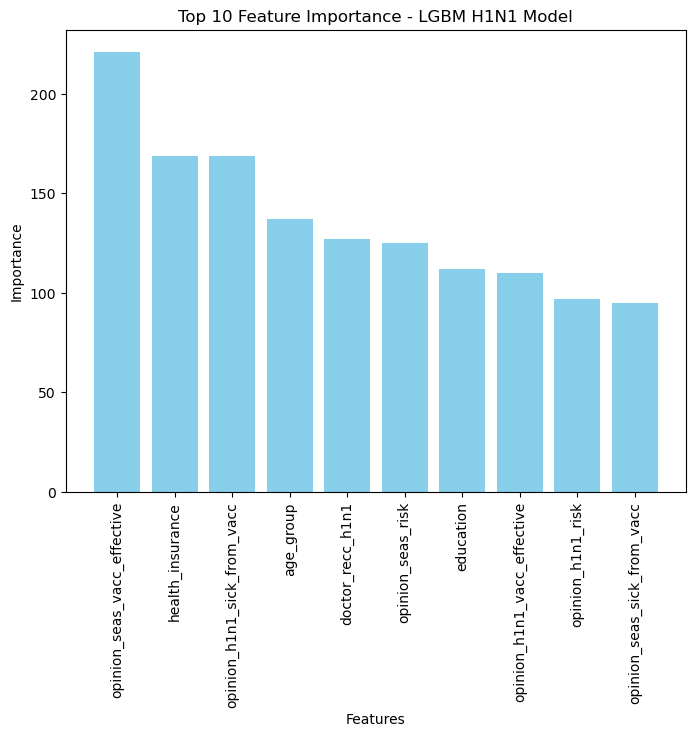

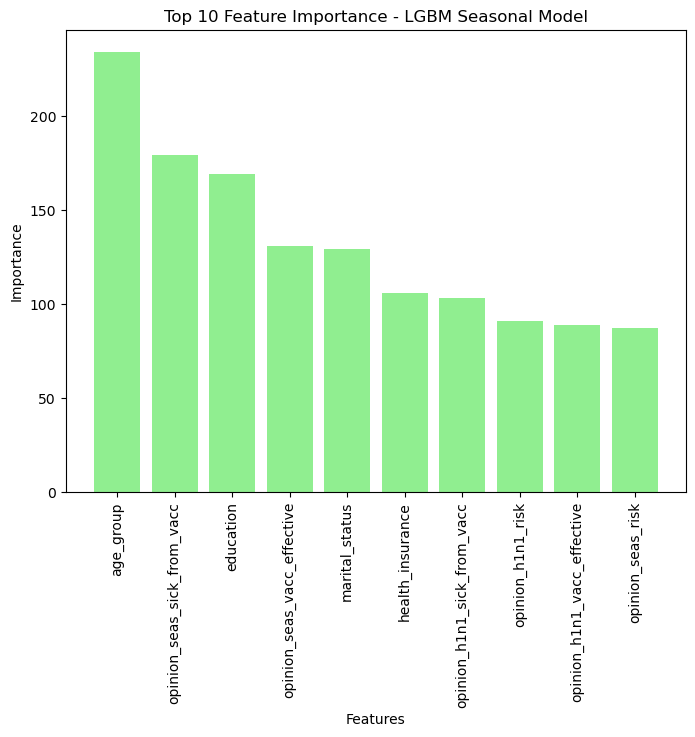

In [49]:
# Get feature importance for H1N1 model
importance_h1n1 = lgbm_h1n1.feature_importances_
feature_names = X_train_clean.columns
feature_importance_h1n1 = sorted(zip(feature_names, importance_h1n1), key=lambda x: x[1], reverse=True)

# Get feature importance for Seasonal model
importance_seasonal = lgbm_seasonal.feature_importances_
feature_importance_seasonal = sorted(zip(feature_names, importance_seasonal), key=lambda x: x[1], reverse=True)

top_features_h1n1 = feature_importance_h1n1[:10]
features_h1n1, importances_h1n1 = zip(*top_features_h1n1)

# Plotting top 10 feature importances for H1N1 model rotated 90 degrees counter-clockwise with rotated x ticks
plt.figure(figsize=(8,6))
bars = plt.bar(features_h1n1, importances_h1n1, align='center', color='skyblue')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.title('Top 10 Feature Importance - LGBM H1N1 Model')
plt.xticks(rotation=90)  # Rotate x ticks by 90 degrees for better readability
#plt.savefig("png")
plt.show()

# Extract top 10 features and importances for Seasonal model
top_features_seasonal = feature_importance_seasonal[:10]
features_seasonal, importances_seasonal = zip(*top_features_seasonal)

# Plotting top 10 feature importances for Seasonal model rotated 90 degrees counter-clockwise with rotated x ticks
plt.figure(figsize=(8, 6))
bars = plt.bar(features_seasonal, importances_seasonal, align='center', color='lightgreen')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.title('Top 10 Feature Importance - LGBM Seasonal Model')
plt.xticks(rotation=90)  # Rotate x ticks by 90 degrees for better readability

plt.show()

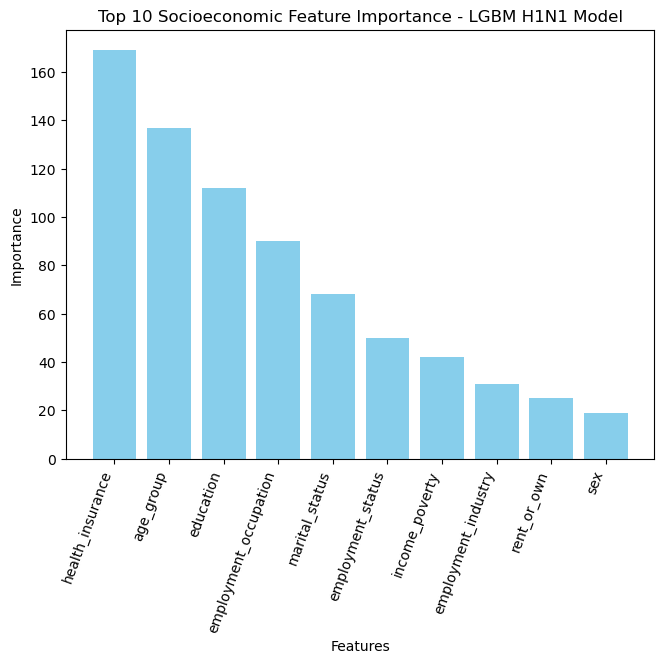

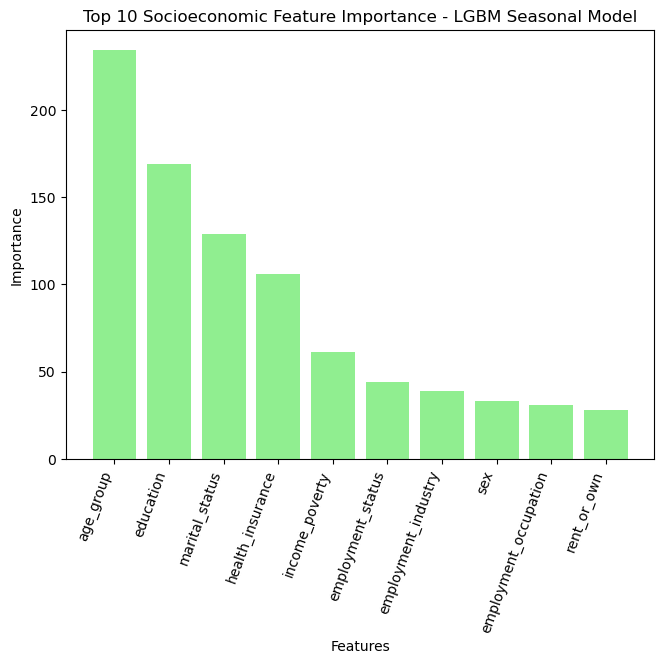

In [50]:
socioeconomic_features = [
    'age_group', 'education', 'race', 'sex', 'income_poverty',
    'marital_status', 'rent_or_own', 'employment_status',
    'employment_industry', 'employment_occupation','health_insurance'
]

# Get feature importance for H1N1 model
importance_h1n1 = lgbm_h1n1.feature_importances_
feature_names = X_train_clean.columns
feature_importance_h1n1 = sorted(zip(feature_names, importance_h1n1), key=lambda x: x[1], reverse=True)

# Filter socioeconomic features for H1N1 model
feature_importance_h1n1_socioeconomic = [f for f in feature_importance_h1n1 if f[0] in socioeconomic_features]

# Get top 10 socioeconomic features for H1N1 model
top_features_h1n1 = feature_importance_h1n1_socioeconomic[:10]
features_h1n1, importances_h1n1 = zip(*top_features_h1n1)

# Plotting top 10 socioeconomic feature importances for H1N1 model
plt.figure(figsize=(7, 7))
bars = plt.bar(features_h1n1, importances_h1n1, align='center', color='skyblue')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.title('Top 10 Socioeconomic Feature Importance - LGBM H1N1 Model')
plt.xticks(rotation=70, ha='right')  # Rotate x ticks by 70 degrees for better readability
plt.tight_layout(pad=2.0)  # Adjust layout to make sure everything fits
plt.savefig('png/Top_10_Socioeconomic_Feature_Importance_LGBM_H1N1_Model.png')  # Save as PNG
plt.show()

# Get feature importance for Seasonal model
importance_seasonal = lgbm_seasonal.feature_importances_
feature_importance_seasonal = sorted(zip(feature_names, importance_seasonal), key=lambda x: x[1], reverse=True)

# Filter socioeconomic features for Seasonal model
feature_importance_seasonal_socioeconomic = [f for f in feature_importance_seasonal if f[0] in socioeconomic_features]

# Get top 10 socioeconomic features for Seasonal model
top_features_seasonal = feature_importance_seasonal_socioeconomic[:10]
features_seasonal, importances_seasonal = zip(*top_features_seasonal)

# Plotting top 10 socioeconomic feature importances for Seasonal model
plt.figure(figsize=(7, 7))
bars = plt.bar(features_seasonal, importances_seasonal, align='center', color='lightgreen')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.title('Top 10 Socioeconomic Feature Importance - LGBM Seasonal Model')
plt.xticks(rotation=70, ha='right')  # Rotate x ticks by 70 degrees for better readability
plt.tight_layout(pad=2.0)  # Adjust layout to make sure everything fits
plt.savefig('png/Top_10_Socioeconomic_Feature_Importance_LGBM_Seasonal_Model.png')  # Save as PNG
plt.show()

In [51]:
pd.DataFrame(y_train_lgbm_h1n1).value_counts()

h1n1_vaccine
0               16821
1               16821
Name: count, dtype: int64

In [52]:
# Check the type and shape of the array
print(type(y_train_lgbm_h1n1))
print(y_train_lgbm_h1n1.shape)

# Convert to DataFrame and get value counts if the shape is correct
if isinstance(y_train_lgbm_h1n1, np.ndarray) and len(y_train_lgbm_h1n1.shape) == 2:
    df = pd.DataFrame(y_train_lgbm_h1n1)
    value_counts = df.value_counts()
    print(value_counts)
else:
    print("y_train_lgbm_h1n1 is not a 2D array.")

<class 'pandas.core.series.Series'>
(33642,)
y_train_lgbm_h1n1 is not a 2D array.


# Example Model - CatBoost
An example model fitted to our project from Adalseno's code on github via the competition.  Used as a reference.

In [53]:
"""
pd.DataFrame.iteritems = pd.DataFrame.items
features_copy = features_df.copy()
labels_copy = labels_df.copy()

# Define columns
num_cols = features_copy.select_dtypes('number').columns
cat_cols = ['race', 'sex', 'marital_status', 'rent_or_own', 'hhs_geo_region',
            'census_msa', 'employment_industry', 'employment_occupation']
ord_cols = ['age_group', 'education', 'income_poverty', 'employment_status']

#params and preprocessing taken from adalseno on github
# Fill missing values
for col in (cat_cols + ord_cols):
    features_copy[col] = features_copy[col].fillna(value='None')
for col in num_cols:
    features_copy[col] = features_copy[col].fillna(value=-1)

# Train-test split for CatBoost
X_train_cboost, X_test_cboost, y_train_cboost, y_test_cboost = train_test_split(features_copy, labels_copy, test_size=0.2, random_state=42)

# Get the index number of categorical features
categorical_features_indices = np.where(X_train_cboost.dtypes == object)[0]

# Preprocess the data for 'h1n1_vaccine'
X_train_h1n1, X_test_h1n1, y_train_h1n1, y_test_h1n1 = X_train_cboost, X_test_cboost, y_train_cboost['h1n1_vaccine'], y_test_cboost['h1n1_vaccine']

# Preprocess the data for 'seasonal_vaccine'
X_train_seasonal, X_test_seasonal, y_train_seasonal, y_test_seasonal = X_train_cboost, X_test_cboost, y_train_cboost['seasonal_vaccine'], y_test_cboost['seasonal_vaccine']

# CatBoost parameters for 'h1n1_vaccine'
params_h1n1 = {
    'iterations': 500,
    'learning_rate': 0.05745075659543725,
    'random_strength': 4,
    'bagging_temperature': 8,
    'max_bin': 5,
    'grow_policy': 'Lossguide',
    'min_data_in_leaf': 7,
    'max_depth': 6,
    'l2_leaf_reg': 11.323094517862078,
    'one_hot_max_size': 10,
    'auto_class_weights': 'Balanced',
    'eval_metric': 'AUC',
    'early_stopping_rounds': 10
}

# CatBoost parameters for 'seasonal_vaccine'
params_seasonal = {
    'iterations': 1500,
    'learning_rate': 0.015393853845985255,
    'random_strength': 3,
    'bagging_temperature': 7,
    'max_bin': 8,
    'grow_policy': 'Lossguide',
    'min_data_in_leaf': 1,
    'max_depth': 5,
    'l2_leaf_reg': 0.03977425239611938,
    'one_hot_max_size': 500,
    'auto_class_weights': 'Balanced',
    'eval_metric': 'AUC',
    'early_stopping_rounds': 10
}

# Initialize and train the CatBoostClassifier for 'h1n1_vaccine'
cat_h1n1 = CatBoostClassifier(**params_h1n1)
cat_h1n1.fit(X_train_h1n1, y_train_h1n1, eval_set=(X_test_h1n1, y_test_h1n1), cat_features=categorical_features_indices, verbose=100)

# Predictions and probabilities for 'h1n1_vaccine' - Train
y_pred_train_proba_h1n1 = cat_h1n1.predict_proba(X_train_h1n1)

# Predictions and probabilities for 'h1n1_vaccine' - Test
y_pred_test_proba_h1n1 = cat_h1n1.predict_proba(X_test_h1n1)

# Initialize and train the CatBoostClassifier for 'seasonal_vaccine'
cat_seasonal = CatBoostClassifier(**params_seasonal)
cat_seasonal.fit(X_train_seasonal, y_train_seasonal, eval_set=(X_test_seasonal, y_test_seasonal), cat_features=categorical_features_indices, verbose=100)

# Predictions and probabilities for 'seasonal_vaccine' - Train
y_pred_train_proba_seasonal = cat_seasonal.predict_proba(X_train_seasonal)

# Predictions and probabilities for 'seasonal_vaccine' - Test
y_pred_test_proba_seasonal = cat_seasonal.predict_proba(X_test_seasonal)

model = "Cat boost"

# Use the summary function to output results for training data
print("Training Data Summary:")
summary(y_train_h1n1, y_train_seasonal, y_pred_train_proba_h1n1, y_pred_train_proba_seasonal,model)

# Use the summary function to output results for testing data
print("Testing Data Summary:")
stats4 = catboost_stats = summary(y_test_h1n1, y_test_seasonal, y_pred_test_proba_h1n1, y_pred_test_proba_seasonal,model)
"""

'\npd.DataFrame.iteritems = pd.DataFrame.items\nfeatures_copy = features_df.copy()\nlabels_copy = labels_df.copy()\n\n# Define columns\nnum_cols = features_copy.select_dtypes(\'number\').columns\ncat_cols = [\'race\', \'sex\', \'marital_status\', \'rent_or_own\', \'hhs_geo_region\',\n            \'census_msa\', \'employment_industry\', \'employment_occupation\']\nord_cols = [\'age_group\', \'education\', \'income_poverty\', \'employment_status\']\n\n#params and preprocessing taken from adalseno on github\n# Fill missing values\nfor col in (cat_cols + ord_cols):\n    features_copy[col] = features_copy[col].fillna(value=\'None\')\nfor col in num_cols:\n    features_copy[col] = features_copy[col].fillna(value=-1)\n\n# Train-test split for CatBoost\nX_train_cboost, X_test_cboost, y_train_cboost, y_test_cboost = train_test_split(features_copy, labels_copy, test_size=0.2, random_state=42)\n\n# Get the index number of categorical features\ncategorical_features_indices = np.where(X_train_cboos

# Model 5 - Random Forest

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters found: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best parameters found: {'max_depth': 30, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100}
Training Data Summary:
Average AUC Score: 0.9196
Accuracy - H1N1: 0.871
Accuracy - Seasonal: 0.835
recall - H1N1: 0.496
recall - Seasonal: 0.812


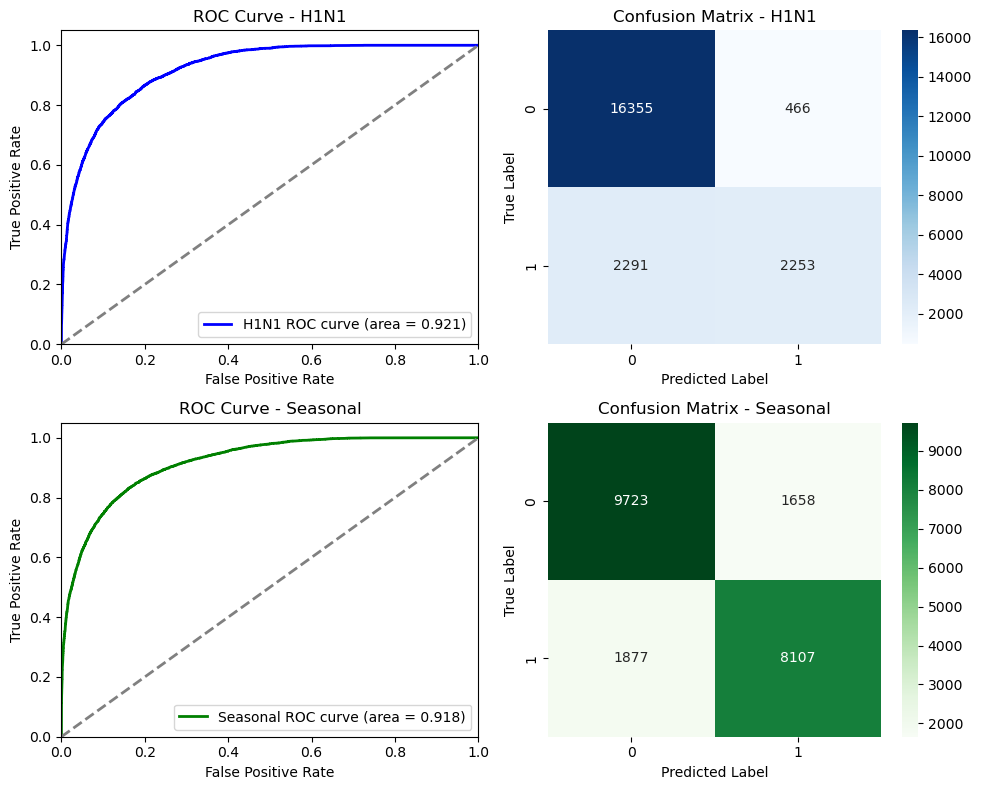

Testing Data Summary:
Average AUC Score: 0.8610
Accuracy - H1N1: 0.852
Accuracy - Seasonal: 0.785
recall - H1N1: 0.446
recall - Seasonal: 0.758


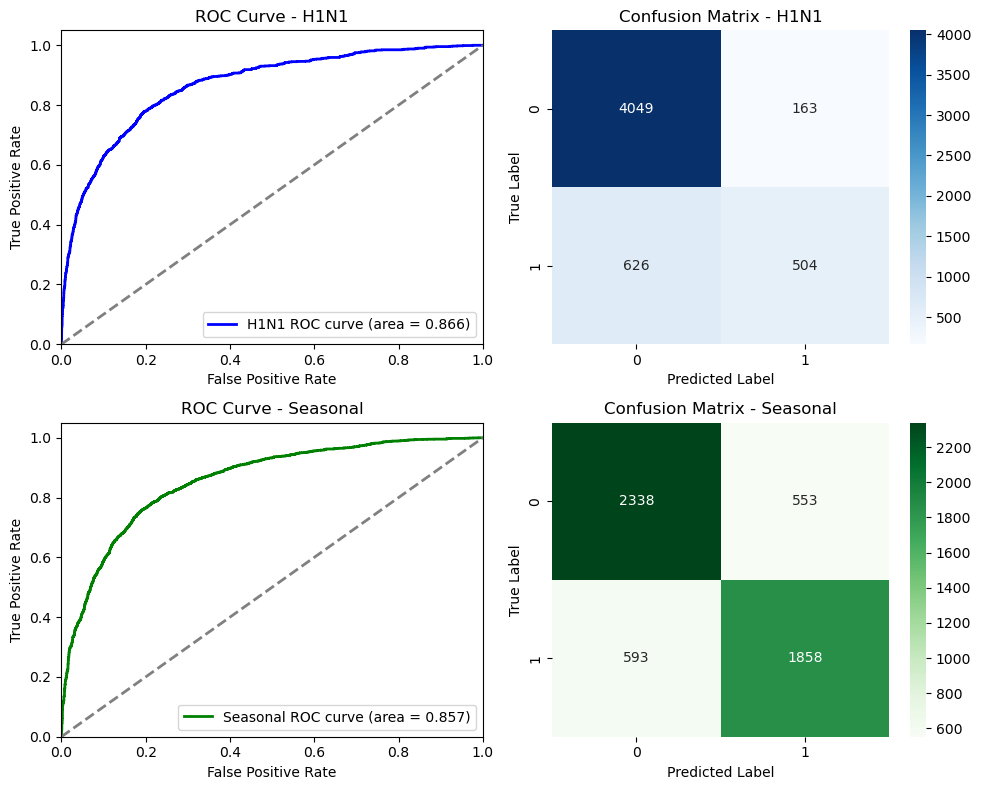

In [54]:
X_train_rforest_h1n1, X_test_rforest_h1n1, y_train_rforest_h1n1, y_test_rforest_h1n1 = final_preprocessor(
    X_train, X_test, y_train['h1n1_vaccine'], y_test['h1n1_vaccine'], 
    use_smote=False, 
    num_imputer_strategy='-1',
    cat_imputer_value='None',
    feature_selection_percent=35
)

# Preprocess the data for 'seasonal_vaccine'
X_train_rforest_seasonal, X_test_rforest_seasonal, y_train_rforest_seasonal, y_test_rforest_seasonal = final_preprocessor(
    X_train, X_test, y_train['seasonal_vaccine'], y_test['seasonal_vaccine'],
    use_smote=False, 
    num_imputer_strategy='-1',
    cat_imputer_value='None',
    feature_selection_percent=35
)

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [None, 20, 30],
    'min_samples_split': [2],
    'min_samples_leaf': [3, 4]
}

# Initialize RandomForestClassifier
forest_h1n1 = RandomForestClassifier(random_state=42)
forest_seasonal = RandomForestClassifier(random_state=42)

# GridSearchCV for 'h1n1_vaccine'
grid_search_h1n1 = GridSearchCV(estimator=forest_h1n1, param_grid=param_grid, 
                                cv=3, n_jobs=-1, verbose=1)
grid_search_h1n1.fit(X_train_rforest_h1n1, y_train_rforest_h1n1)

# Best estimator for 'h1n1_vaccine'
best_forest_h1n1 = grid_search_h1n1.best_estimator_

# Predictions and probabilities for 'h1n1_vaccine' - Train
y_pred_train_proba_rforest_h1n1 = best_forest_h1n1.predict_proba(X_train_rforest_h1n1)

# Predictions and probabilities for 'h1n1_vaccine' - Test
y_pred_test_proba_rforest_h1n1 = best_forest_h1n1.predict_proba(X_test_rforest_h1n1)

# GridSearchCV for 'seasonal_vaccine'
grid_search_seasonal = GridSearchCV(estimator=forest_seasonal, param_grid=param_grid, 
                                    cv=3, n_jobs=-1, verbose=1)
grid_search_seasonal.fit(X_train_rforest_seasonal, y_train_rforest_seasonal)

# Best estimator for 'seasonal_vaccine'
best_forest_seasonal = grid_search_seasonal.best_estimator_

# Predictions and probabilities for 'seasonal_vaccine' - Train
y_pred_train_proba_rforest_seasonal = best_forest_seasonal.predict_proba(X_train_rforest_seasonal)

# Predictions and probabilities for 'seasonal_vaccine' - Test
y_pred_test_proba_rforest_seasonal = best_forest_seasonal.predict_proba(X_test_rforest_seasonal)

# Example usage with the grid searches performed
report_best_params(grid_search_h1n1)
report_best_params(grid_search_seasonal)

model = "Random Forest"

# Use the summary function to output results for training data
print("Training Data Summary:")
summary(y_train_rforest_h1n1, y_train_rforest_seasonal, y_pred_train_proba_rforest_h1n1, y_pred_train_proba_rforest_seasonal,model)

# Use the summary function to output results for testing data
print("Testing Data Summary:")
stats5 = summary(y_test_rforest_h1n1, y_test_rforest_seasonal, y_pred_test_proba_rforest_h1n1, y_pred_test_proba_rforest_seasonal,model)

# Models Meltdown
Models we played with but didn't use in our project beyond gathering ideas and understanding

## MLPClassifier

Average AUC Score: 0.7411
Accuracy - H1N1: 0.768
Accuracy - Seasonal: 0.695
recall - H1N1: 0.465
recall - Seasonal: 0.647


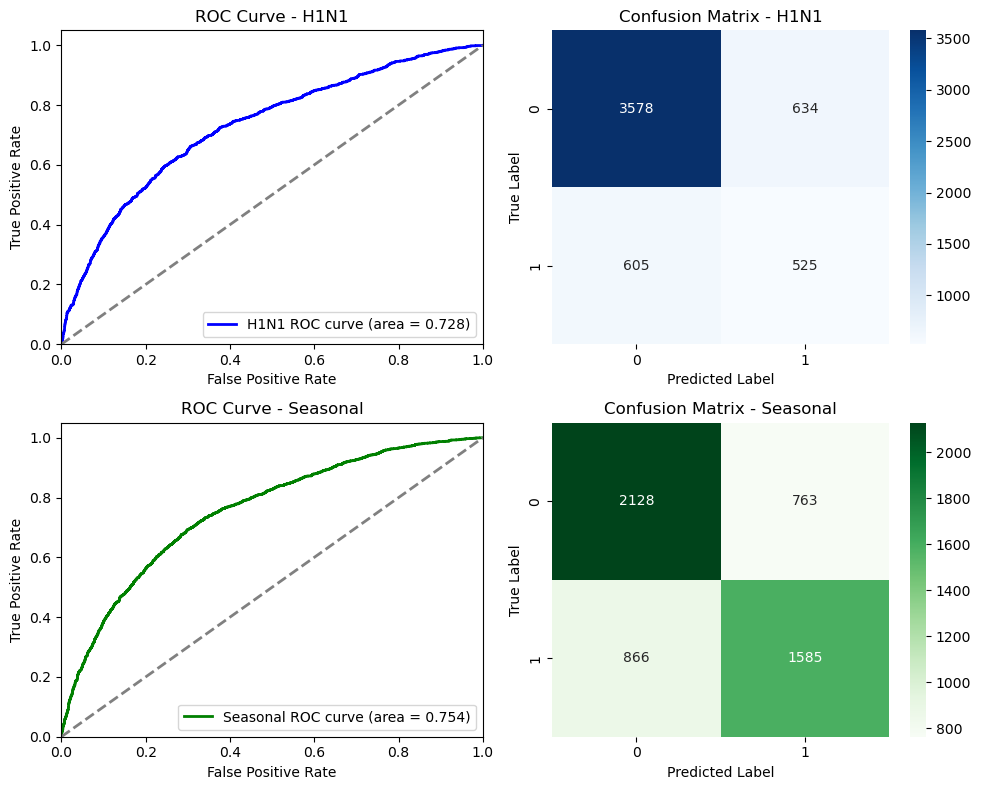

In [55]:
# Preprocess the data for 'h1n1_vaccine'
X_train_mlp_h1n1, X_test_mlp_h1n1, y_train_mlp_h1n1, y_test_mlp_h1n1 = final_preprocessor(
    X_train, X_test, y_train['h1n1_vaccine'], y_test['h1n1_vaccine'], use_smote=False
)

# Preprocess the data for 'seasonal_vaccine'
X_train_mlp_seasonal, X_test_mlp_seasonal, y_train_mlp_seasonal, y_test_mlp_seasonal = final_preprocessor(
    X_train, X_test, y_train['seasonal_vaccine'], y_test['seasonal_vaccine'], use_smote=False
)

# Train MLPClassifier for 'h1n1_vaccine'
mlp_h1n1 = MLPClassifier(random_state=42, max_iter=1000)
mlp_h1n1.fit(X_train_mlp_h1n1, y_train_mlp_h1n1)

# Predictions and probabilities for 'h1n1_vaccine'
y_pred_mlp_h1n1 = mlp_h1n1.predict(X_test_mlp_h1n1)
y_pred_proba_mlp_h1n1 = mlp_h1n1.predict_proba(X_test_mlp_h1n1)

# Train MLPClassifier for 'seasonal_vaccine'
mlp_seasonal = MLPClassifier(random_state=42, max_iter=1000)
mlp_seasonal.fit(X_train_mlp_seasonal, y_train_mlp_seasonal)

# Predictions and probabilities for 'seasonal_vaccine'
y_pred_mlp_seasonal = mlp_seasonal.predict(X_test_mlp_seasonal)
y_pred_proba_mlp_seasonal = mlp_seasonal.predict_proba(X_test_mlp_seasonal)


model = "MLP"
# Call the summary function with appropriate parameters
stats9 = summary(y_test_mlp_h1n1, y_test_mlp_seasonal, y_pred_proba_mlp_h1n1, y_pred_proba_mlp_seasonal,model)


## K-Nearest Neighbors

Average AUC Score: 0.7650
Accuracy - H1N1: 0.813
Accuracy - Seasonal: 0.723
recall - H1N1: 0.392
recall - Seasonal: 0.711


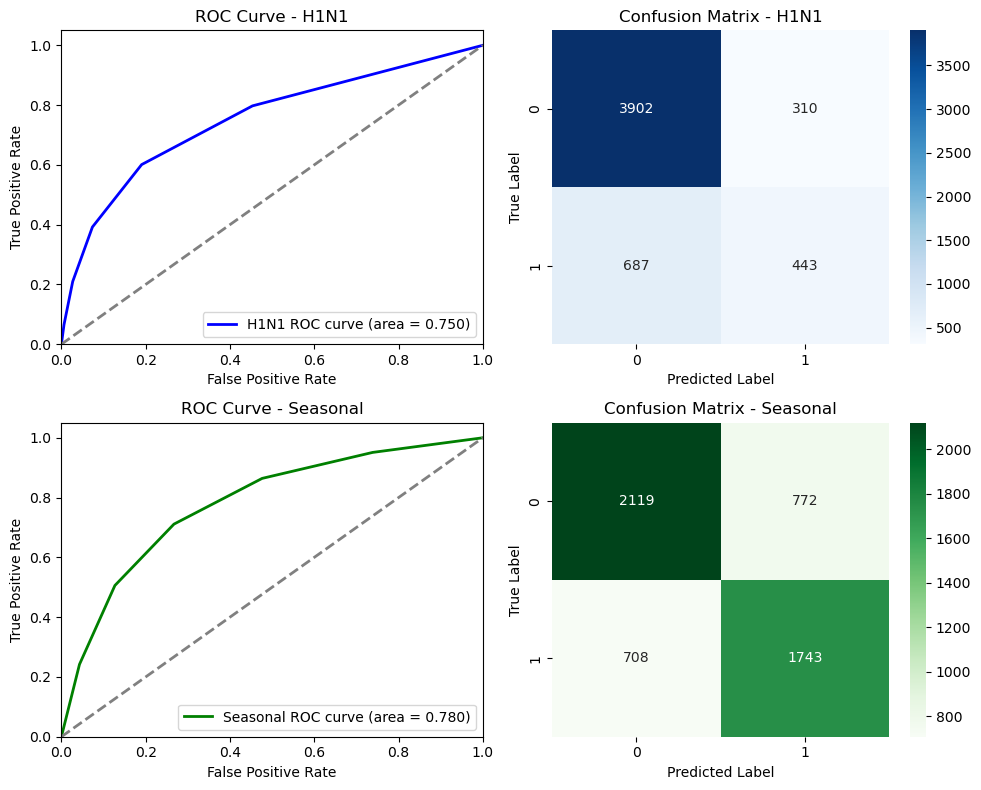

In [56]:
# Preprocess the data for 'h1n1_vaccine'
X_train_knn_h1n1, X_test_knn_h1n1, y_train_knn_h1n1, y_test_knn_h1n1 = final_preprocessor(
    X_train, X_test, y_train['h1n1_vaccine'], y_test['h1n1_vaccine'], use_smote=False,
    #using minmax lowered the score despite KNN being sensitive to outliers
    scaler='standard'
)

# Preprocess the data for 'seasonal_vaccine'
X_train_knn_seasonal, X_test_knn_seasonal, y_train_knn_seasonal, y_test_knn_seasonal = final_preprocessor(
    X_train, X_test, y_train['seasonal_vaccine'], y_test['seasonal_vaccine'], use_smote=False,
    #using minmax lowered the score despite KNN being sensitive to outliers
    scaler='standard'
)

# Train KNeighborsClassifier for 'h1n1_vaccine'
knn_h1n1 = KNeighborsClassifier()
knn_h1n1.fit(X_train_knn_h1n1, y_train_knn_h1n1)

# Predictions and probabilities for 'h1n1_vaccine'
y_pred_knn_h1n1 = knn_h1n1.predict(X_test_knn_h1n1)
y_pred_proba_knn_h1n1 = knn_h1n1.predict_proba(X_test_knn_h1n1)

# Train KNeighborsClassifier for 'seasonal_vaccine'
knn_seasonal = KNeighborsClassifier()
knn_seasonal.fit(X_train_knn_seasonal, y_train_knn_seasonal)

# Predictions and probabilities for 'seasonal_vaccine'
y_pred_knn_seasonal = knn_seasonal.predict(X_test_knn_seasonal)
y_pred_proba_knn_seasonal = knn_seasonal.predict_proba(X_test_knn_seasonal)

model = "K-Nearest"

# Call the summary function with appropriate parameters
stats7 = summary(y_test_knn_h1n1, y_test_knn_seasonal, y_pred_proba_knn_h1n1, y_pred_proba_knn_seasonal,model)


## AdaBoost

/home/atrix/anaconda3/envs/rapids_env/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/atrix/anaconda3/envs/rapids_env/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Average AUC Score: 0.8438
Accuracy - H1N1: 0.838
Accuracy - Seasonal: 0.783
recall - H1N1: 0.413
recall - Seasonal: 0.736


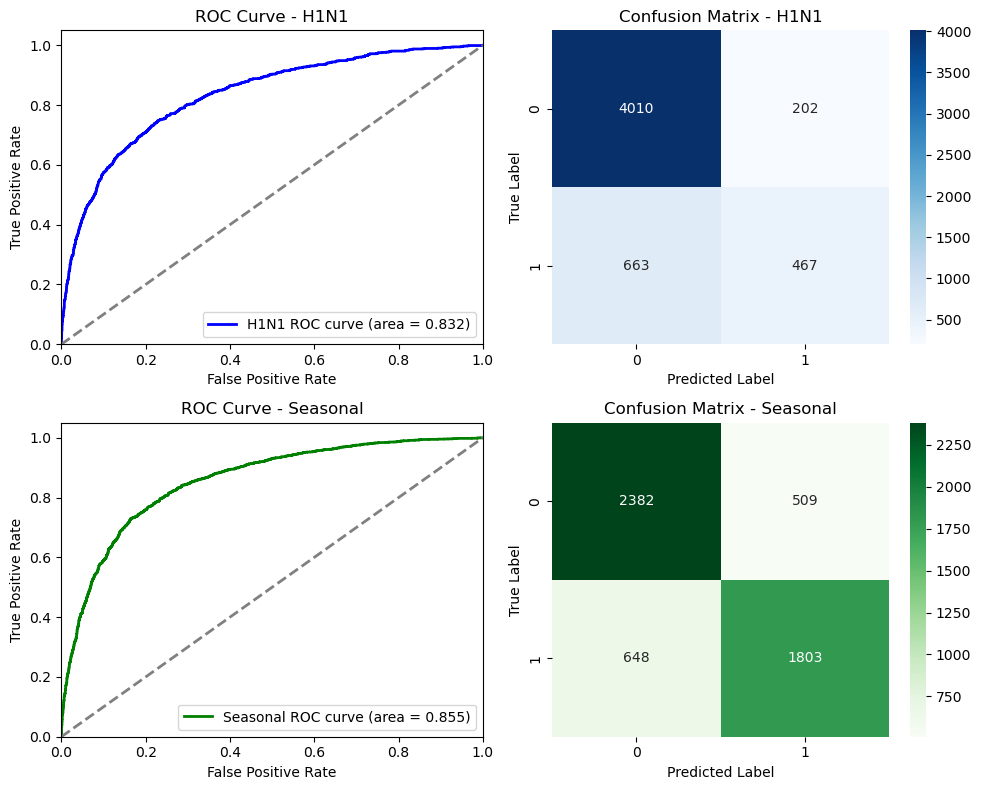

In [57]:
# Preprocess the data for 'h1n1_vaccine'
X_train_ada_h1n1, X_test_ada_h1n1, y_train_ada_h1n1, y_test_ada_h1n1 = final_preprocessor(
    X_train, X_test, y_train['h1n1_vaccine'], y_test['h1n1_vaccine'], use_smote=False
)

# Preprocess the data for 'seasonal_vaccine'
X_train_ada_seasonal, X_test_ada_seasonal, y_train_ada_seasonal, y_test_ada_seasonal = final_preprocessor(
    X_train, X_test, y_train['seasonal_vaccine'], y_test['seasonal_vaccine'], use_smote=False
)

# Train AdaBoostClassifier for 'h1n1_vaccine'
ada_h1n1 = AdaBoostClassifier(random_state=42)
ada_h1n1.fit(X_train_ada_h1n1, y_train_ada_h1n1)

# Predictions and probabilities for 'h1n1_vaccine'
y_pred_ada_h1n1 = ada_h1n1.predict(X_test_ada_h1n1)
y_pred_proba_ada_h1n1 = ada_h1n1.predict_proba(X_test_ada_h1n1)

# Train AdaBoostClassifier for 'seasonal_vaccine'
ada_seasonal = AdaBoostClassifier(random_state=42)
ada_seasonal.fit(X_train_ada_seasonal, y_train_ada_seasonal)

# Predictions and probabilities for 'seasonal_vaccine'
y_pred_ada_seasonal = ada_seasonal.predict(X_test_ada_seasonal)
y_pred_proba_ada_seasonal = ada_seasonal.predict_proba(X_test_ada_seasonal)

model = "ADA"

# Call the summary function with appropriate parameters
stats8 = summary(y_test_ada_h1n1, y_test_ada_seasonal, y_pred_proba_ada_h1n1, y_pred_proba_ada_seasonal,model)


In [58]:
load_models_from_pickle = False
save_models_to_pickle = False
if load_models_from_pickle:
    with open('models.pkl', 'rb') as file:
        models = pickle.load(file)

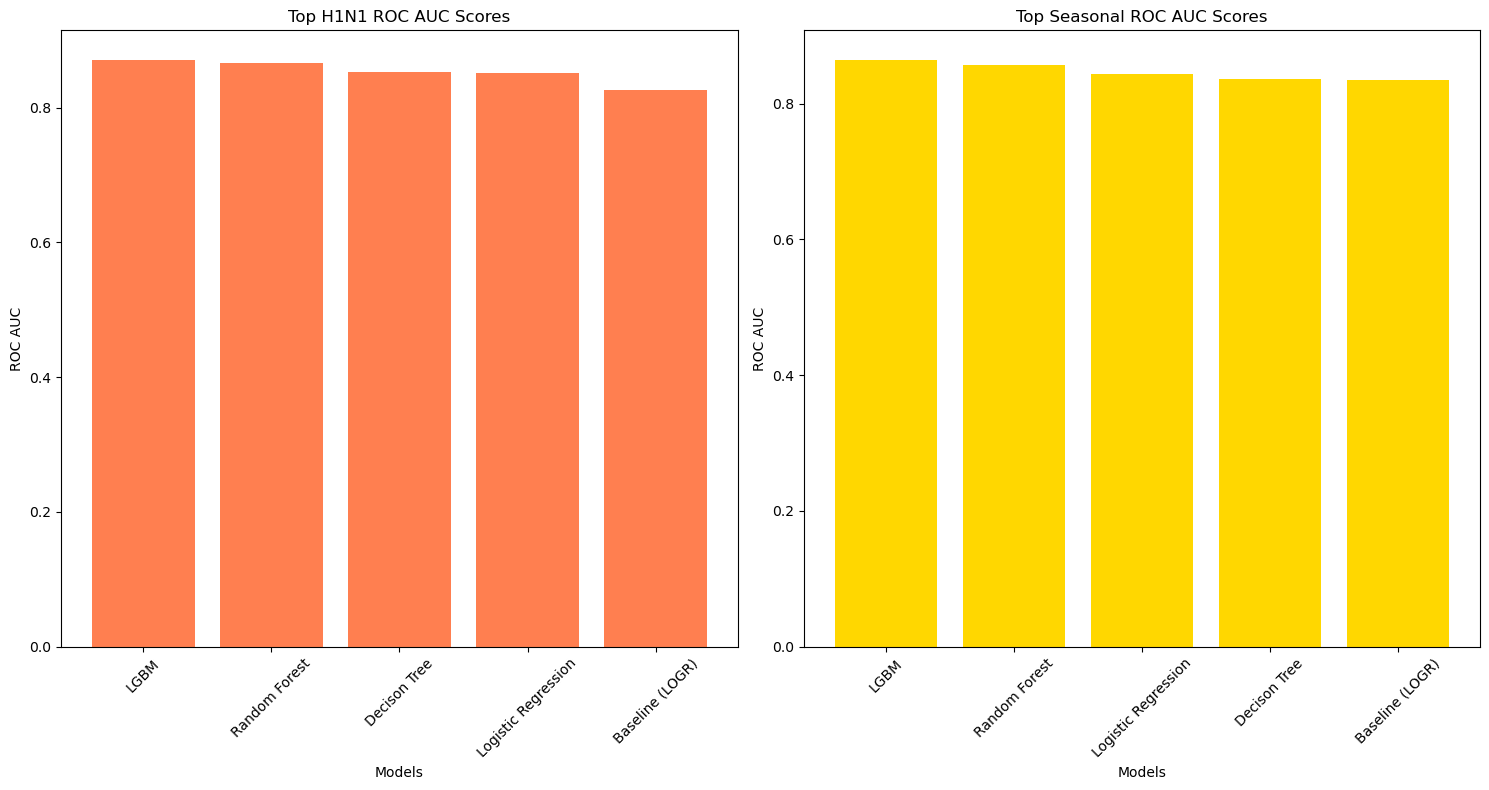

In [59]:
# Stats plots

#models = [stats1, stats2, stats3, stats5, stats6, stats7, stats8, stats9]
models = [stats6, stats5, stats3, stats1, stats2]

# Extract ROC AUC values and model names from each model
roc_h1n1_test_scores = [model['roc_auc_h1n1'] for model in models]
roc_seasonal_test_scores = [model['roc_auc_seasonal'] for model in models]
model_names = [model['model'] for model in models]

# Combine the scores and names and sort by scores in descending order
combined_roc_h1n1 = sorted(zip(roc_h1n1_test_scores, model_names), key=lambda x: x[0], reverse=True)
combined_roc_seasonal = sorted(zip(roc_seasonal_test_scores, model_names), key=lambda x: x[0], reverse=True)

# Unzip the sorted combined lists
sorted_roc_h1n1_test_scores, sorted_model_names_roc_h1n1 = zip(*combined_roc_h1n1)
sorted_roc_seasonal_test_scores, sorted_model_names_roc_seasonal = zip(*combined_roc_seasonal)

# Plotting ROC AUC scores
fig, axs = plt.subplots(1, 2, figsize=(15, 8))

# Top H1N1 ROC AUC Scores
axs[0].bar(sorted_model_names_roc_h1n1, sorted_roc_h1n1_test_scores, color='coral')
axs[0].set_xlabel('Models')
axs[0].set_ylabel('ROC AUC')
axs[0].set_title('Top H1N1 ROC AUC Scores')
axs[0].tick_params(axis='x', rotation=45)

# Top Seasonal ROC AUC Scores
axs[1].bar(sorted_model_names_roc_seasonal, sorted_roc_seasonal_test_scores, color='gold')
axs[1].set_xlabel('Models')
axs[1].set_ylabel('ROC AUC')
axs[1].set_title('Top Seasonal ROC AUC Scores')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [60]:
# Save the models as a pickle file
if save_models_to_pickle:
    with open('models.pkl', 'wb') as file:
        pickle.dump(models, file)

# Evaluation
## Rationale
Predicting the likelihood of individuals getting vaccinated against H1N1 and seasonal flu is crucial for public health planning and intervention. Given the complexity of the dataset, which includes numerous features such as demographic information, health behaviors, and even the impact of unanswered questions, machine learning is an ideal approach. Machine learning models can handle this complexity and interrelationships among features, providing accurate predictions and valuable insights that traditional statistical methods may not capture. This predictive capability allows for more targeted and effective public health strategies.

## Results
The performance of our models is primarily evaluated using the ROC AUC (Receiver Operating Characteristic Area Under the Curve), supplemented by confusion matrices and accuracy scores. 

### ROC AUC

#### Why ROC AUC?
ROC AUC is a valuable metric for binary classification problems, particularly in the context of this project, for several reasons:

- **Distinction of Model Performance**: An AUC of 0.5 indicates random guessing, while an AUC of 1 signifies perfect classification. This makes it an excellent measure of a model's ability to distinguish between classes.
- **Model Comparison**: ROC AUC provides a standardized way to compare different models, regardless of their underlying mechanisms. It is particularly useful for comparing the performance of models developed by different teams or in different competitions.
- **Intuitiveness**: The ROC curve visually represents the trade-off between true positive and false positive rates, making it easier to understand and interpret, and it is also visual.
- **Robustness**: While metrics like accuracy, recall, and precision can be significantly affected by threshold choices and class imbalances, ROC AUC provides a more stable evaluation across various conditions.

#### Real-World Implications
An ROC AUC score close to 1 means the model is highly reliable in distinguishing between individuals who will get vaccinated and those who will not. This insight can guide targeted public health interventions, ensuring resources are directed towards those less likely to get vaccinated, thereby improving overall vaccination rates and public health outcomes.

### Supplementary Metrics

#### Confusion Matrices
Confusion matrices provide a detailed breakdown of true positives, true negatives, false positives, and false negatives. This allows us to understand specific areas where the model may be making errors.

- **Real-World Implications**: For stakeholders, understanding false positives and false negatives can help in refining communication strategies. For example, if the model often falsely predicts that certain demographics will not get vaccinated when they actually will, public health messages can be adjusted accordingly.

These are used to gain deeper insights into specific prediction errors. For instance, by analyzing the confusion matrix, we can identify whether the model tends to over-predict or under-predict vaccination likelihood, guiding further model refinement.

#### Accuracy
Accuracy measures the overall correctness of the model’s predictions. While useful, it can be misleading in imbalanced datasets.

- **Real-World Implications**: For a business audience, accuracy gives a general sense of the model’s performance but should be interpreted with caution. It is more relevant when the class distribution is balanced.

Although not the primary metric due to potential imbalances, accuracy still provides a quick snapshot of model performance. It is supplemented with other metrics to give a fuller picture.

### Summary of Model Performance

- **ROC AUC for H1N1 Vaccine Prediction**: The model achieved an AUC score of 0.871 using LightGBM, indicating it is fairly good at predicting if an individual will get h1n1 vaccinated.
- **ROC AUC for Seasonal Vaccine Prediction**: Similar performance with an average AUC score of 0.865 using LightGBM.

These scores reflect the model’s robustness and effectiveness in predicting vaccination likelihood, making it a valuable tool for public health decision-making.

By using these metrics, we ensure a comprehensive evaluation of our models, highlighting their strengths and areas for improvement in predicting vaccination likelihood.

## Limitations
**Potential overfitting** - some of the models have quite a bit higher score on the training data than the validation set of data.  However, it doesn't seem to be affecting predictive power.

**Class Imbalance** - Despite picking a metric robust vs class imbalance it can still affect model performance and ROC AUC.  Using SMOTE and class weights when tried seemed to make it worse except for in the LightGBM model with our last implementation of SMOTE.

**Missing Data** - While multiple imputation strategies were tried, more time could yield even more improvement to scores by exploring more imputation or drop strategies.

**Dated Data** - The data is for h1n1 and from 2009, and the h1n1 is included with the seasonal vaccine now so this is mostly used to understand human behaviors.  However much changes with time so it might not generalize well to modern day.

**Population Source** - The data might not generalize well to other populations outside the one it was taken.


### Conclusions and Recommendations

Based on the comprehensive analysis of the 2009 H1N1 Flu Survey data, we have developed a predictive model to determine the likelihood of individuals receiving H1N1 and seasonal flu vaccinations. The conclusions drawn from this study, coupled with actionable recommendations, are aimed at improving vaccination rates and public health outcomes.

**Key Findings:**

1. **Determinants of Vaccination:**
   - **Education and Age:** Individuals with lower education levels and younger age groups are less likely to receive vaccinations.
   - **Health Concerns:** Concerns about vaccine side effects and perceived effectiveness significantly impact vaccination decisions.
   - **Healthcare Access:** Those without health insurance and individuals who do not receive a doctor's recommendation are less likely to get vaccinated.
   - **Perception of Risk:** People who perceive a lower risk of not getting the seasonal vaccine are less likely to be vaccinated for both H1N1 and seasonal flu.

2. **Model Performance:**
   - The Light Gradient Boosting Model (LightGBM) emerged as the top performer with an ROC AUC score of 0.8679, indicating high predictive power.
   - The importance of preprocessing techniques, such as encoding missing numerical data and using SMOTE for class imbalance, was highlighted in improving model performance.

3. **Socioeconomic Factors:**
   - Socioeconomic factors like health insurance status, occupation, and age group significantly influence vaccination likelihood. These insights can help target interventions more effectively.

**Recommendations:**

1. **Free Vaccination Programs:**
   - **Health Insurance:** Provide free vaccines to individuals without health insurance to remove financial barriers.
   - **Targeted Campaigns:** Conduct vaccination drives in communities with low vaccination rates, focusing on areas with higher populations of uninsured individuals.

2. **Public Awareness and Education:**
   - **Informing the Public:** Increase public awareness about the benefits and safety of vaccines through health worker training and targeted marketing campaigns.
   - **Doctor's Role:** Train healthcare providers to emphasize the importance of vaccination recommendations to their patients, especially for H1N1.

3. **Addressing Vaccine Hesitancy:**
   - **Risk Communication:** Develop communication strategies to address concerns about vaccine side effects and effectiveness.
   - **Engagement with Younger Populations:** Create specific outreach programs targeting younger age groups to educate them about the importance of vaccination.

4. **Policy and Healthcare Integration:**
   - **Electronic Health Records:** Integrate predictive models into electronic health records to help healthcare providers identify and engage with patients less likely to be vaccinated.
   - **Policy Development:** Use the insights from the predictive models to inform policymakers about potential outbreak locations and to design effective vaccination strategies.

**Future Steps:**

- **Data Expansion:** Utilize historical and real-time data to enhance the model's accuracy and predictive capabilities.
- **Survey Updates:** Conduct more frequent surveys to keep the model's predictions relevant and accurate.
- **Broader Applications:** Develop websites and visual tools to communicate data and predictions to the public, and leverage these insights for targeted marketing by pharmaceutical companies.

By implementing these recommendations, we can improve vaccination rates, prevent disease outbreaks, save lives, and create a healthier, more productive society. Predictive modeling serves as a powerful tool to guide effective vaccination strategies and improve public health outcomes on a broad scale.

Thank you for your time and attention. We are now open to any questions you might have.
